<h1 style="background-color:#32db6e; color:white ; padding: 20px 30px; border-radius:10px; font-size:25px; text-align:center;">Time Series forcasting sur AirPassengers Série</h1>

<h3>Encadré par : </h3> <ul><li>Mr.Abdelwahab NAJI</li></ul>
<h3>Réalisé par : </h3> <ul> <li>Abdelaali LAMRANI</li><li>Wissal ZAZOU</li><li>Chaymae MANSOURI</li></ul>

<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">IMPORTER LES  BIBLIOTHEQUES</h4>

In [1]:
#Importation des bibs
import pandas as pd
import numpy as np
import math as m
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot

#Pour ingnorer les warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv("AirPassengers.csv",header=0, parse_dates=True)
#Convertir le dataframe en une série
df=df1.squeeze()

<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">DATA EXPLORING</h4>

In [3]:
#Afficher les 5 premières valeurs
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
#Le type de chaque colonne
print(df.dtypes)

Month          object
#Passengers     int64
dtype: object


In [5]:
#Changer le type de la colonne Month: object ==> datetime
df['Month'] = pd.to_datetime(df['Month'])
print(df.dtypes)

Month          datetime64[ns]
#Passengers             int64
dtype: object


La conversion de 'Month' de 'object' à 'datetime' permet d'utiliser des fonctionnalités spécifiques aux séries temporelles et facilite la manipulation des données temporelles.

In [6]:
# Définir la colonne 'Month' comme index pour l'utiliser comme axe temporel principal pour la série
df.set_index('Month',inplace=True)
print(df.dtypes)

#Passengers    int64
dtype: object


La définition de la colonne 'Month' comme index permet d'accéder plus facilement aux données temporelles, de réaliser des opérations basées sur le temps et d'utiliser des fonctionnalités spécifiques aux séries temporelles dans pandas.

In [7]:
#Renommer la colonne Passengers
df = df.rename(columns={"#Passengers": "Passengers"})
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
#Dimension de la serie
df.shape

(144, 1)

La colonne 'Month' devient l'index, et l'index n'est pas compté comme une colonne dans la forme du DataFrame.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


Le DataFrame a été transformé de manière à avoir un index basé sur des dates (de janvier 1949 à décembre 1960). Il contient une seule colonne nommée 'Passengers', avec 144 valeurs non nulles de type entier 64 bits.

In [10]:
#Résumé statiqtique de la série
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


<ul>
    <li>La colonne 'Passengers' de notre série temporelle contient 144 entrées</li>
    <li>La moyenne du nombre de passagers sur l'ensemble de la période est d'environ 280</li>
    <li>L'écart-type des données est d'environ 120, indiquant une certaine variabilité dans le nombre de passagers.</li>
    <li>Le nombre minimum de passagers en un mois donné est de 104.</li>
    <li>Le premier quartile (25%) des données est à 180, ce qui signifie que 25% des mois ont un nombre de passagers inférieur à 180.</li>
    <li>La médiane (50%) est de 265.5, indiquant que la moitié des mois ont un nombre de passagers inférieur à ce chiffre.</li>
    <li>Le troisième quartile (75%) est à 360.5, montrant que 75% des mois ont un nombre de passagers inférieur à 360.5.</li>
    <li>Le nombre maximal de passagers en un mois donné est de 622.</li>
</ul>

<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">DATA VISUALISATION</h4>

<Axes: xlabel='Month'>

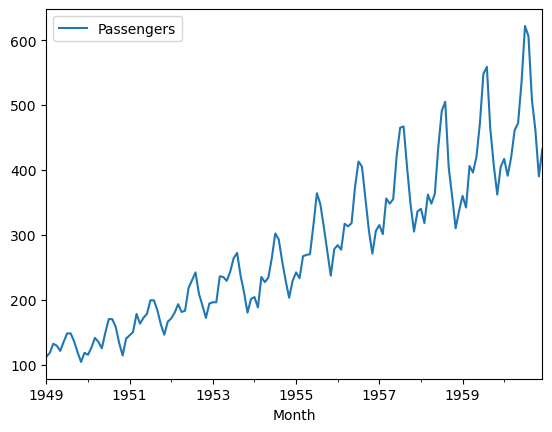

In [11]:
#line plot de la serie
df.plot()

Le graphe représente l'augmentation constante du nombre de passagers aériens de 1949 à 1960 (trend croissant), avec des fluctuations saisonnières montrant des pics annuels probablement liés à des vacances ou des événements cycliques.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

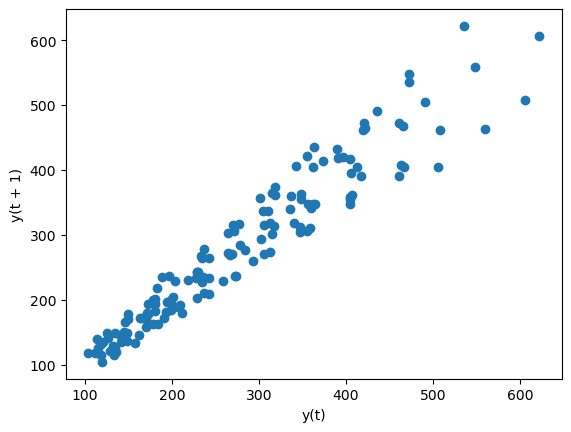

In [12]:
lag_plot(df)

Le graphe est un diagramme de dispersion qui compare les valeurs d'une série temporelle à l'instant t avec les valeurs de la même série à l'instant t+1.<br> La corrélation positive et linéaire entre y(t) et y(t+1) indique une forte dépendance temporelle ; c'est-à-dire l'état présent a une influence sur l'état futur.

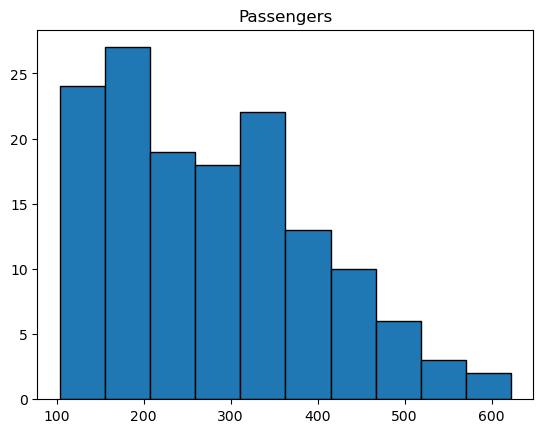

In [13]:
#histogramme de la serie
df.hist(edgecolor='black',grid=False)
plt.show()

L'histogramme représente la distribution du nombre de passagers. La plupart des mois ont un nombre de passagers dans les intervalles inférieurs, avec moins de mois à mesure que le nombre de passagers augmente, suggérant une distribution asymétrique avec une queue à droite, indiquant que des nombres élevés de passagers sont moins fréquents.

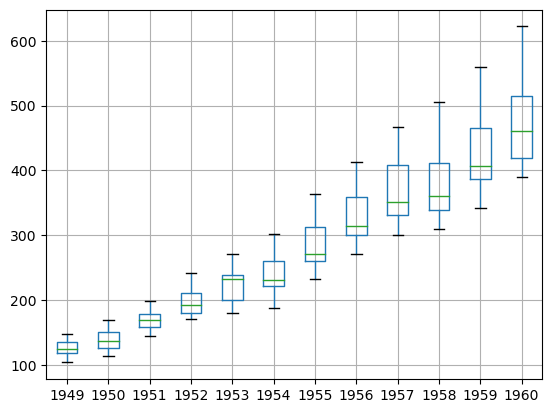

In [14]:
#box plot de la serie
groups = df.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.squeeze().values
years.boxplot()
plt.show()

Ce graphique en boîtes montre la distribution du nombre de passagers par année, de 1949 à 1960. <br>Chaque boîte représente une année et montre la médiane (ligne centrale de la boîte), les quartiles (bords de la boîte), et les valeurs extrêmes (les "moustaches" s'étendent du minimum au maximum, hors des valeurs aberrantes). L'augmentation de la médiane au fil du temps indique une tendance à la hausse du nombre de passagers d'année en année. La variation de la taille des boîtes et la longueur des moustaches reflètent la variabilité du nombre de passagers au sein de chaque année.

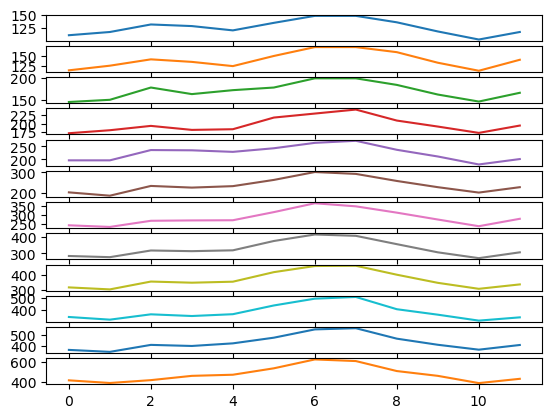

In [17]:
# stacked line plots
years.plot(subplots=True, legend=False)
plt.show()

Ce graphique présente des lignes empilées qui représentent vraisemblablement le nombre de passagers pour chaque mois sur plusieurs années (de 1949 à 1960, comme indiqué dans les précédentes analyses). Chaque ligne individuelle représente une année différente et les points sur la ligne marquent le nombre de passagers pour chaque mois de cette année. La tendance saisonnière peut être vue avec des pics répétés chaque année, ce qui indique une augmentation périodique du nombre de passagers, probablement liée à des événements saisonniers comme les vacances.

<AxesSubplot:ylabel='Passengers'>

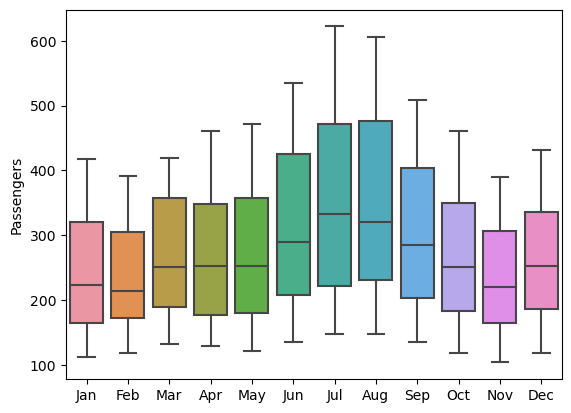

In [18]:
# Création d'un boxplot avec Seaborn
# L'axe des x représente les mois (abrégés) extraits de l'index du DataFrame df
# L'axe des y représente le nombre de passagers (colonne 'Passengers' du DataFrame)
sns.boxplot(x=[d.strftime('%b') for d in df.index], y='Passengers', data=df)

Le boxplot illustre clairement la saisonnalité dans le volume de passagers, avec des variations notables selon les mois. Des
médianes plus hautes et des boîtes plus grandes pendant certains mois suggèrent des pics de voyage, possiblement liés aux
vacances ou au tourisme saisonnier. Cette tendance indique que la demande de transport fluctue au fil de l'année.

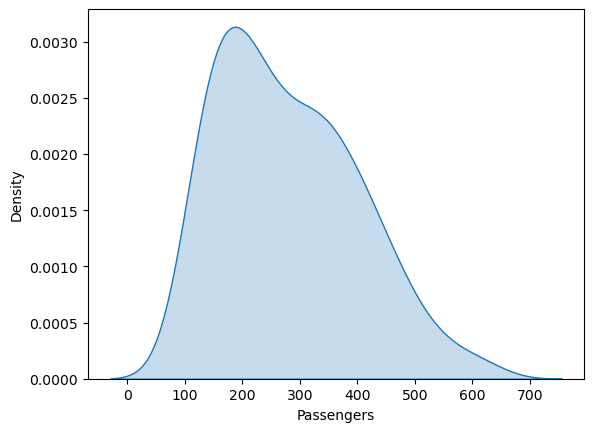

In [19]:
# Density plot de la serie
sns.kdeplot(df["Passengers"], fill=True)
plt.show()

La courbe lisse indique où les valeurs sont concentrées, avec un pic principal montrant une fréquence élevée à certaines périodes. Cependant, la présence d'une queue étirée vers les nombres plus élevés suggère une distribution asymétrique, avec moins de mois présentant des nombres de passagers élevés.

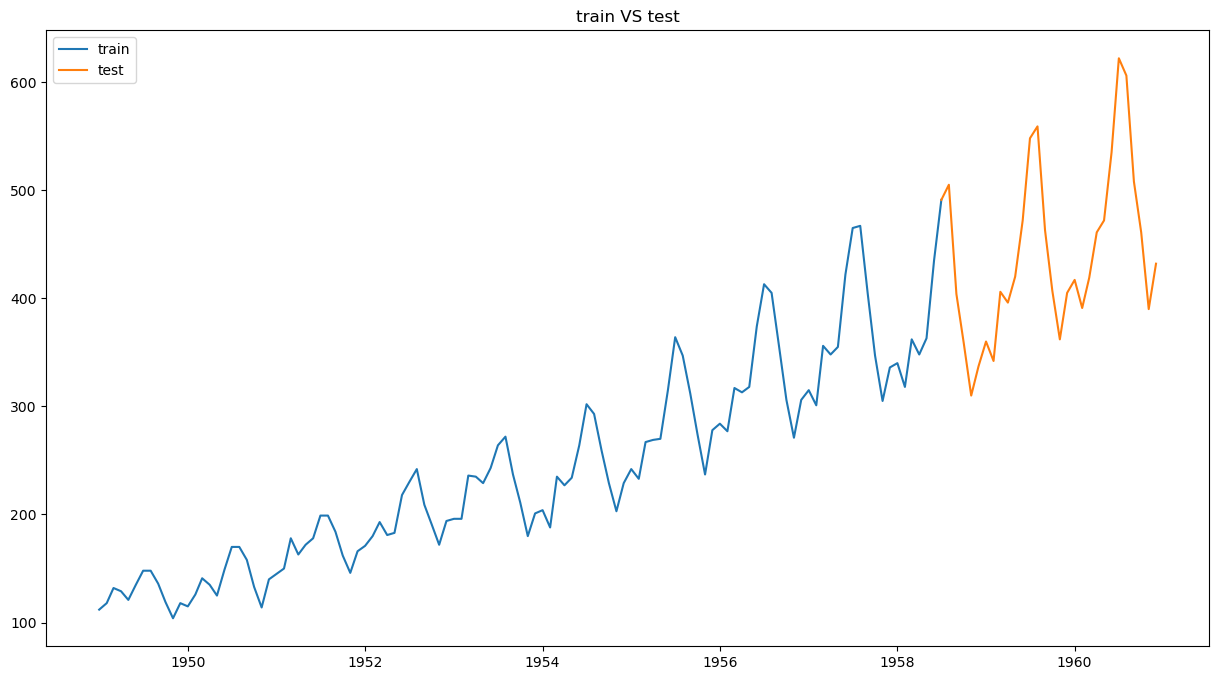

In [11]:
# Définir la taille d'entraînement
train_size = int(len(df) * 0.8)

# Extraire la colonne "Passengers" en tant que série
df1 = df["Passengers"]

# Extraire les données d'entraînement et de test
train = df1.iloc[0:train_size]
test = df1.iloc[train_size-1:]

plt.figure(figsize=(15, 8))

# Tracer les données d'entraînement et de test 
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.title('train VS test')
plt.legend()
plt.show()

Le graphique affiche deux séries temporelles, représentant les données d'entraînement ('train') en bleu et les données de test ('test') en orange. <br> Les données d'entraînement couvrent la période allant du début à environ 80% de la série, tandis que les données de test couvrent les 20% restants. <br>

<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">DATA CLEANING</h4>

In [12]:
#compter le nombre des valeurs nulles
df.isna().sum()

Passengers    0
dtype: int64

Il n'y a aucune valeur nulle (NaN) dans la colonne "Passengers" de la série temporelle, ce qui confirme l'absence de données manquantes.

In [13]:
#compter le nombre de duplications dans la serie
df['Passengers'].duplicated().sum()

26

Il y a 26 duplications dans la série temporelle pour la colonne "Passengers". Cela signifie qu'il y a 26 valeurs qui se répètent dans la série.

<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">Test de la  Stationarity avec adfuller</h4>

In [14]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
result = adfuller(df['Passengers'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] <= 0.05:
    print("==> On rejet l'hypothèse H0 , donc la série est stationnaire")
else:
    print("==> On accepte H0, donc la série est non stationnaire ")

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
==> On accepte H0, donc la série est non stationnaire 


Le test vise à déterminer si la série temporelle est stationnaire. Dans ce cas, le p-value est supérieur à 0.05, ce qui signifie que l'hypothèse nulle (H0) de non-stationnarité est acceptée, indiquant que la série n'est pas stationnaire.

In [25]:
#Décomposer la série en trend seasonality et residus
decomposed = seasonal_decompose(df['Passengers'], model = 'additive')


Décomposer la série temporelle des passagers en 3 composantes principales : tendance (trend), saisonnalité (seasonality) et résidus (residuals). La décomposition additive est utilisée, ce qui signifie que l'on suppose que la série temporelle peut être décomposée en une somme de ces trois composantes.
Yt = Tt + St + Rt

In [26]:
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

<b>Trend :</b> (tendance) Croissance ou décroissance continue de la série temporelle au fil du
temps.<br>
<b>Seasonality :</b> (saisonnalité) Les variations périodiques qui se produisent à des intervalles de 
temps réguliers.<br>
<b>Residual :</b> (résidu) Variations aléatoires dans les observations que le modèle ne peut pas 
expliquer.<br>

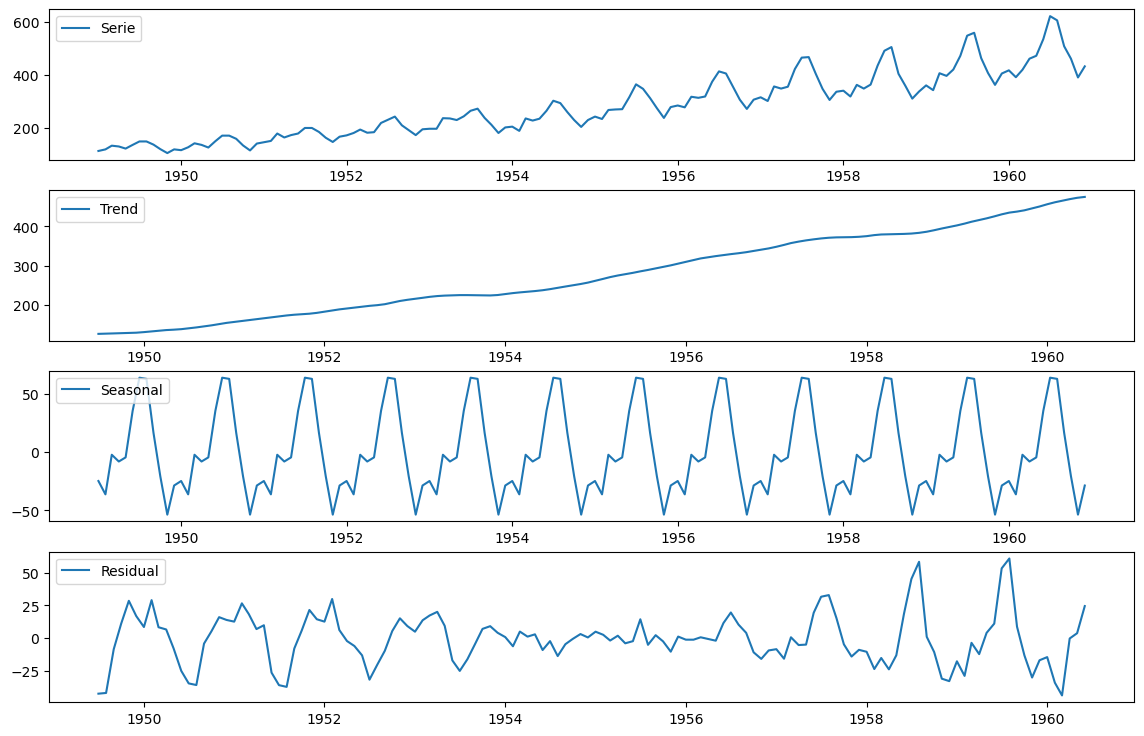

In [27]:
plt.figure(figsize=(14,9))
plt.subplot(411)
plt.plot(df , label='Serie')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.show()

La décomposition de la série temporelle des passagers aériens en trois composantes : une tendance croissante sur plusieurs années, des motifs saisonniers annuels, et des variations aléatoires résiduelles.
<h4>La présence de ces éléments rend la série <b>non stationnaire</b></h4>

<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">DATA PREPARATION</h4>

In [15]:
#normaliser les données
df = df[["Passengers"]].astype(float)
sc=MinMaxScaler(feature_range=(0,1)) #scaler
df_scaled=sc.fit_transform(df[['Passengers']].values)

Normaliser les données de la colonne 'Passengers' en les mettant à l'échelle entre 0 et 1. <br>La normalisation est souvent utilisée pour garantir que les variables sont à des échelles comparables.

In [16]:
len(df_scaled),len(df)

(144, 144)

In [17]:
df[0:10]

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


In [18]:
df_scaled[0:10]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

In [19]:
# Création de X_data et y_data en utilisant une fenêtre glissante (Sliding window)
X_data=[]
y_data=[]
window=20
for i in range (len(df_scaled)-window):
    X_data.append(df_scaled[i:(i+window),0])
    y_data.append(df_scaled[i+window,0])
X_data,y_data=np.array(X_data),np.array(y_data)
print(pd.DataFrame({
    "X_data":X_data[:17,0],
    "y_data":y_data[:17]}))

      X_data    y_data
0   0.015444  0.104247
1   0.027027  0.055985
2   0.054054  0.019305
3   0.048263  0.069498
4   0.032819  0.079151
5   0.059846  0.088803
6   0.084942  0.142857
7   0.084942  0.113900
8   0.061776  0.131274
9   0.028958  0.142857
10  0.000000  0.183398
11  0.027027  0.183398
12  0.021236  0.154440
13  0.042471  0.111969
14  0.071429  0.081081
15  0.059846  0.119691
16  0.040541  0.129344


'X_data' représente les données d'entrée (caractéristiques) , et 'y_data' représente les valeurs cibles correspondantes. Ces paires séquentielles  créées avec la technique Sliding Window pour permettre au modèle de séries temporelles d'apprendre à prédire les valeurs futures en se basant sur les observations passées.

Ce code avec la fenêtre glissante effectue manuellement ce que la fonction <b>shift</b> pourrait accomplir plus simplement.

In [33]:
# methode 2(faite en classe)
def data_creating(window):
    window= 20
    # Convertir le tableau NumPy en DataFrame
    df_shifted = pd.DataFrame(df_scaled, columns=['Passengers'])
    
    df_shifted['X_data'] = df_shifted['Passengers'].shift(window)
    
    # Supprimer les lignes avec des valeurs manquantes (Nan) résultantes du décalage
    df_shifted = df_shifted.dropna()
    
    # Renommer la colonne 'Passengers' décalée comme 'y_data'
    df_shifted = df_shifted.rename(columns={'Passengers': 'y_data'})
    
    # Afficher le DataFrame résultant
    #print(df_shifted[['X_data', 'y_data']])
    return df_shifted[['X_data', 'y_data']]


In [34]:
data_creating(20).iloc[0:10]

,X_data,y_data
20,0.015444,0.104247
21,0.027027,0.055985
22,0.054054,0.019305
23,0.048263,0.069498
24,0.032819,0.079151
25,0.059846,0.088803
26,0.084942,0.142857
27,0.084942,0.113900
28,0.061776,0.131274
29,0.028958,0.142857


In [20]:
# Définir la taille d'entraînement en 80% train et 20% test
train_size = int(len(df) * 0.8)

#division de la serie en train et test
X_train=X_data[0:train_size,:]
X_test=X_data[train_size:len(X_data),:]
y_train=y_data[0:train_size]
y_test=y_data[train_size:len(y_data)]

print("dim de X_train :",X_train.shape)
print("dim de y_train :",y_train.shape)
print("dim de X_test :",X_test.shape)
print("dim de y_test :",y_test.shape)

dim de X_train : (115, 20)
dim de y_train : (115,)
dim de X_test : (9, 20)
dim de y_test : (9,)


<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">FORECASTING AVEC ANN</h4>

<h4 >ENTRAINEMENT DU MODELE</h4>

In [22]:
#importation des bibs necessaires pour ANN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense


from keras.optimizers import Adam

from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.callbacks import EarlyStopping

#ignorer les warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [23]:
#la creation du modèle avec 2 couches cachées 
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Couche de sortie avec une seule unité pour la régression
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________
None


model.add( Dense( units, activation='', input_dim ) )<br>
<font color='blue'><b>units: </b></font> nombre de neurones dans la couche<br>
<font color='blue'><b>activation: </b></font> fonction d'activation<br>
<font color='blue'><b>input_dim: </b></font> nbr de features dans chq exmpl de données d'entraînement entré dans la 1ère couche du réseau

Le modèle ANN séquentiel est créé, qui est une pile linéaire de couches, défini avec <b>2 couches cachées </b> et <b>une couche de sortie. Le modèle est entraîné sur les données d'entraînement.</b><br>
<ul>
    <li><i>La 1ère couche cachée: dense, avec 64 neurones, une fonction d'activation 'relu' et 1344 paramètres</i></li>
    <li><i>La dimension d'entrée (input_dim) est définie sur X_train.shape[1], qui est 20 dans notre cas.</i></li>
    <li><i>La 2ème  couche cachée: dense, avec 32 neurones, une fonction d'activation 'relu' et 2080 paramètres (chaque neurone a une connexion à chaque entrée).</i></li>
    <li><i>La couche de sortie est également une couche dense avec une seule unité, une activation linéaire et 33 paramètres (connexion de chaque neurone caché plus un biais).</i></li>
    <br>Cette couche est utilisée pour la régression, car elle prédit une valeur continue.<br> (Pour les tâches de régression, une activation linéaire est couramment utilisée à la couche de sortie.)
</ul>

(Une couche dense est une couche où chaque neurone est connecté à chaque neurone de la couche précédente.)

In [141]:
# Compiler le modèle(étape cruciale qui configure le modèle pour l'entraînement)
model.compile(optimizer='adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

<font color='red'><b>Optimizer: </b></font>
L'optimiseur est un algorithme qui ajuste les poids du réseau neuronal pendant l'entraînement. L'objectif est de minimiser la fonction de perte (<font color='red'>Loss Function</font>), qui mesure la différence entre les prédictions du modèle et les valeurs réelles.Dans ce cas, 'mean_squared_error' est utilisé, ce qui signifie que la fonction de perte est l'erreur quadratique moyenne. (Pour les tâches de régression, cette fonction est couramment utilisée. Elle calcule la moyenne des carrés des différences entre les prédictions et les vraies valeurs.)
<b>'adam'</b> est un optimiseur populaire dans le domaine des réseaux neuronauxen raison de son adaptation automatique du taux d'apprentissage et de son efficacité. 

<font color='red'><b>EarlyStopping</b>:</font> L'arrêt anticipé est une technique utilisée pendant l'entraînement pour éviter le surajustement du modèle. Le surajustement se produit lorsque le modèle s'adapte trop bien aux données d'entraînement et ne généralise pas bien sur de nouvelles données. L'idée de l'arrêt anticipé est d'arrêter l'entraînement lorsque la performance du modèle sur l'ensemble de validation cesse de s'améliorer.

<font color='green'><b>monitor='loss' :</b></font> L'arrêt anticipé se base sur la perte d'entraînement (loss).<br>
<font color='green'><b>patience=5 : </b></font>Si la perte d'entraînement ne s'améliore pas pendant 5 époques consécutives, l'entraînement est arrêté.  Cela permet d'optimiser l'efficacité de l'entraînement en évitant de gaspiller des ressources lorsque les performances du modèle stagnent.<br>
<font color='green'><b>verbose=1 : </b></font>Affiche des messages d'informations pendant l'entraînement pour suivre le processus.</p>

In [142]:
# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, callbacks=[early_stop],validation_data=(X_test, y_test), shuffle=False)


Epoch 1/100
4/4 [==============================] - 1s 51ms/step - loss: 0.1509 - val_loss: 0.3112
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0459 - val_loss: 0.0855
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0096 - val_loss: 0.0219
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0087 - val_loss: 0.0300
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0138 - val_loss: 0.0360
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0121 - val_loss: 0.0263
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0074 - val_loss: 0.0187
Epoch 8/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0055 - val_loss: 0.0209
Epoch 9/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0063 - val_loss: 0.0250
Epoch 10/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0062 - val_loss: 0.0210
Epoch 11/100
4/4 [=

<b>model.fit</b> est utilisée pour entraîner le modèle de réseau de neurones.

<font color='green'><b>X_train:</b></font> représente les données d'entrée (features) d'entraînement.<br><br>
<font color='green'><b>y_train:</b></font> représente les étiquettes (labels) correspondantes aux données d'entraînement.<br><br>
<font color='green'><b>epochs :</b></font> Le nombre d'epochs détermine combien de fois le modèle va traverser l'ensemble complet des données d'entraînement.Dans notre cas on a 100 itérations.<br><br>
<font color='green'><b>batch_size :</b></font> définit le nombre d'échantillons d'entraînement utilisés pour mettre à jour les poids du modèle à chaque itération d'entraînement. Dans ce cas, le modèle est mis à jour après chaque lot de 32 échantillons.<br><br>
<font color='green'><b>validation_data :</b></font> C'est l'ensemble de données (X_test, y_test) sur lequel le modèle est évalué à la fin de chaque epoch. Cela permet de surveiller la performance du modèle sur un ensemble de données distinct de celui d'entraînement, aidant ainsi à identifier le surajustement (overfitting).<br><br>
<font color='green'><b>verbose :</b></font> Ce paramètre contrôle le niveau de détails des informations affichées pendant l'entraînement. verbose=1 affiche une barre de progression avec des informations détaillées, tandis que verbose=0 n'affiche aucune information pendant l'entraînement.<br><br>
<font color='green'><b>shuffle :</b></font>Ce paramètre détermine si les données d'entraînement doivent être mélangées avant chaque epoch. Ici, shuffle=False indique que les données ne sont pas mélangées.

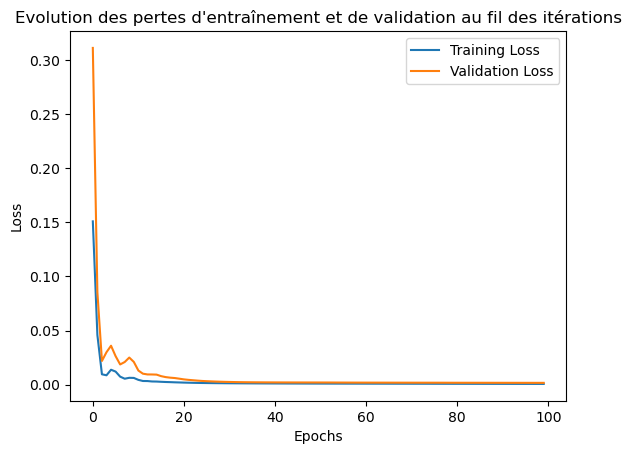

In [143]:
# Liste des valeurs de perte sur l'ensemble d'entraînement et validation
losses = history.history['loss']  
val_losses = history.history['val_loss']
# Tracer la courbe des pertes
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Evolution des pertes d'entraînement et de validation au fil des itérations")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.savefig('plt_ann_1.png')
plt.show()

Le graphe illustre que les pertes d'entraînement et de validation diminuent et se stabilisent au fil des époques. La stabilisation semble se produire<b> autour de l'époque 20</b>, après quoi les deux courbes descendent légèrement et restent proches l'une de l'autre, indiquant <b>un bon équilibre entre apprentissage et généralisation</b>.

<h4 >EVALUATION DU MODELE</h4>

In [144]:
# Évaluer le modèle sur l'ensemble d'entraînement et de validation
loss1=model.evaluate(X_train,y_train)
print(f"la perte de train est: {loss1}")
loss = model.evaluate(X_test, y_test)
print(f"perte de test est: {loss}")

4/4 [==============================] - 0s 3ms/step - loss: 6.6299e-04
la perte de train est: 0.0006629893905483186
1/1 [==============================] - 0s 23ms/step - loss: 0.0017
perte de test est: 0.0016579085495322943


Le modèle montre une <font color='red'>bonne performance</font> avec une <b>faible perte sur l'ensemble d'entraînement ( 0.00066)</b> et une <b>perte</b> légèrement plus élevée mais toujours relativement <b>basse sur l'ensemble de test (0.00165).</b> Cela suggère que <b>le modèle a bien appris les données d'entraînement et généralise bien sur de nouvelles données.</b>

In [145]:
#Evaluer le modèle avec rmse 
trainPredict_ann = model.predict(X_train)
testPredict_ann = model.predict(X_test)
rmse_test=sqrt(mean_squared_error(y_test,testPredict_ann))
rmse_train=sqrt(mean_squared_error(y_train,trainPredict_ann))

print("rmse de train ",rmse_train)
print("rmse de test ",rmse_test)

1/1 [==============================] - 0s 23ms/step
rmse de train  0.025748579344774012
rmse de test  0.040717412307648325


Le modèle montre une<font color='red'> bonne performance </font>avec une <b>faible perte sur l'ensemble d'entraînement (0.02574)</b> ce qui montre  que le <b>modèle s'est bien adapté aux données sur lesquelles il a été formé,</b> et une <b>perte</b> légèrement plus élevée mais toujours relativement <b>basse sur l'ensemble de test (0.04071).</b> <br>Cela suggère que <b>le modèle a bien appris à partir des données d'entraînement et est capable de généraliser bien ses prédictions à de nouvelles données.(ensemble de test)</b>

In [146]:
#Faire des prédictions sur l'ensemble d'entraînement et l'ensemble de test en revenant à l'échelle réelle.
trainPredict_ann = sc.inverse_transform(trainPredict_ann)
y_train= sc.inverse_transform([y_train])
testPredict_ann = sc.inverse_transform(testPredict_ann)
y_test = sc.inverse_transform([y_test])

Le modèle a été entraîné sur des données mises à l'échelle entre 0 et 1, mais il est  préférable de revenir à l'échelle d'origine des données pour faciliter  la comparaison et l'évaluation des performances du modèle dans le contexte des données d'origine.

In [147]:
#Afficher les 5 premières observations de trainPredicted et de train
print(np.round(trainPredict_ann[:5].T,2))
print(y_train[:,:5])

[[156.79 138.26 128.32 128.92 146.59]]
[[158. 133. 114. 140. 145.]]


Les résultats affichés représentent les cinq premières observations du modèle sur l'ensemble d'entraînement, comparées aux vraies valeurs correspondantes. <b>Les prédictions semblent généralement proches des vraies valeurs</b>, ce qui suggère une performance raisonnable du modèle sur cet échantillon d'entraînement spécifique.

In [148]:
#Afficher les 5 premières observations de testPredicted et de test
print(np.round(testPredict_ann[:5].T,2))
print(y_test[:,:5])

[[437.39 485.39 532.17 608.31 614.15]]
[[461. 472. 535. 622. 606.]]


Les résultats affichés représentent les cinq premières observations du modèle sur l'ensemble de test, comparées aux vraies valeurs correspondantes. <b>Les prédictions semblent être dans la même plage que les vraies valeurs</b>, ce qui suggère une performance raisonnable du modèle sur cet échantillon de test spécifique.

In [149]:
#RMSE sur l'échelle réel
rmse_train_ann = m.sqrt(mean_squared_error(y_train[0,:], trainPredict_ann[:,0]))
print('Train Score: %.2f RMSE' % (rmse_train_ann))

rmse_test_ann = m.sqrt(mean_squared_error(y_test[0,:], testPredict_ann[:,0]))
print('Test Score: %.2f RMSE' % (rmse_test_ann))


Train Score: 13.34 RMSE
Test Score: 21.09 RMSE


Un "Train Score" de 13.34 RMSE et un "Test Score" de 21.09 RMSE suggèrent que le modèle réalise des prédictions précises sur l'ensemble d'entraînement et montre une performance acceptable sur l'ensemble de test. Cela implique que le modèle, tout en étant fiable sur les données connues, conserve une efficacité raisonnable lorsqu'il est confronté à de nouvelles données.

In [150]:
trainPredictPlot_ann = np.empty_like(df)
trainPredictPlot_ann[:, :] = np.nan
trainPredictPlot_ann[window:len(trainPredict_ann)+window, :] = trainPredict_ann


In [151]:
testPredictPlot_ann = np.empty_like(df)
testPredictPlot_ann[:, :] = np.nan
testPredictPlot_ann[len(trainPredict_ann)+window:len(df), :] = testPredict_ann
#testPredictPlot_ann[len(trainPredict_ann):len(df)-window, :] = testPredict_ann


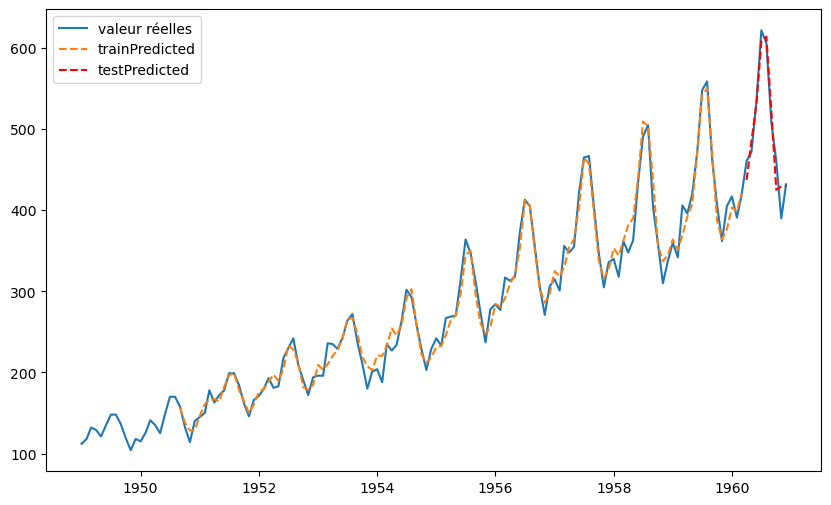

In [152]:
#plot de la série des prédictions

plt.figure(figsize=(10, 6))
plt.plot(df.index,df.values,label="valeur réelles")
plt.plot(df.index,trainPredictPlot_ann,linestyle='dashed',label="trainPredicted")
plt.plot(df.index,testPredictPlot_ann,linestyle='dashed',color="red",label="testPredicted")
plt.legend()
#plt.savefig('plt_ann_2.png')
plt.show()

Le graphe montre un modèle de prédiction qui suit de près les valeurs réelles d'une série temporelle pour les périodes d'entraînement et de test entre 1950 et 1960. Les prédictions pour les données d'entraînement sont très proches des valeurs réelles. <b>ce qui indique que le modèle a bien appris les tendances des données d'entraînement </b>.Les prédictions de test, qui commencent vers la fin du graphique, semblent également suivre les tendances des valeurs réelles,Avec un écart négligable.<b>Cela suggère que le modèle généralise bien à de nouvelles données</b>.

1/1 [==============================] - 0s 26ms/step


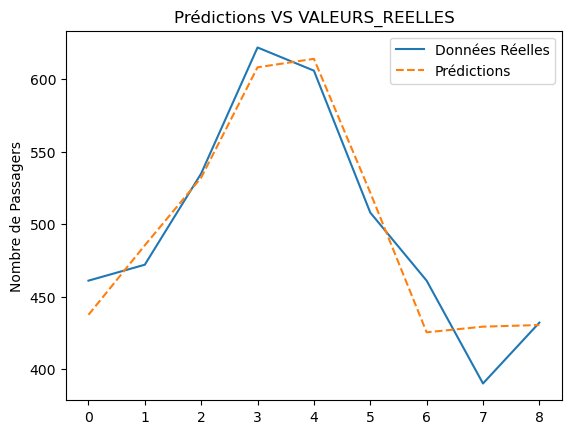

In [154]:
# Tracer les prédictions par rapport aux données réelles pour dataset test
predictions = model.predict(X_test)
#predictions = sc.inverse_transform(predictions)  *
plt.plot( y_test.reshape(-1, 1), label='Données Réelles')
plt.plot( sc.inverse_transform(predictions), label='Prédictions', linestyle='dashed')
plt.title('Prédictions VS VALEURS_REELLES')
plt.ylabel('Nombre de Passagers')
plt.legend()
plt.savefig('plt_ann_3.png')
plt.show()

Bien que le modèle présente une divergence à la fin de la période observée, où il ne détecte pas une baisse significative dans les données réelles, cette limitation n'affecte pas son efficacité de manière générale. En somme, ¨<b>le modèle démontre une bonne performance</b>, étant donné qu'il suit fidèlement les tendances des données réelles tout au long de la majorité de la période étudiée.

<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">FORECASTING AVEC ARIMA</h4>

<h4 >DATA VISUALISATION  ETAPE IMPORTANTE POUR ARIMA</h4>

In [34]:
#importation des bibs pour ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

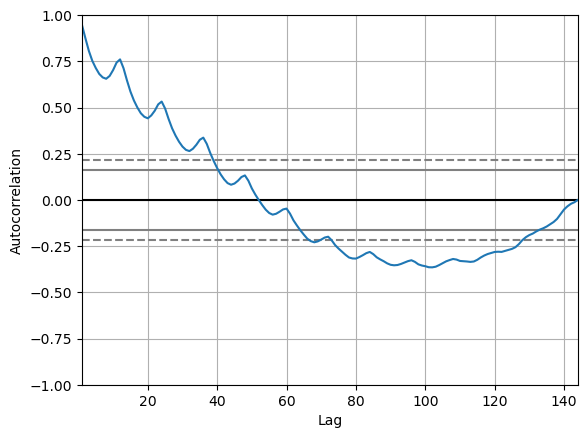

In [25]:
#tracer le graphe d'autocorrelation
autocorrelation_plot(df)
plt.show()

Le graphique d'autocorrélation illustre que les valeurs initiales d'une série de données ont une forte corrélation avec leurs valeurs précédentes, qui diminue progressivement avec l'augmentation du nombre de lags. La corrélation est significative pour les 40 premiers lags.

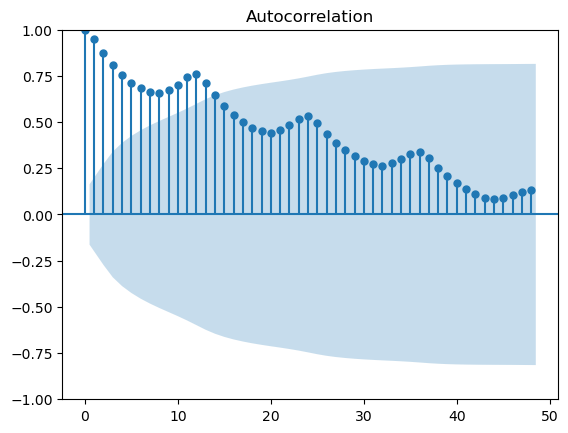

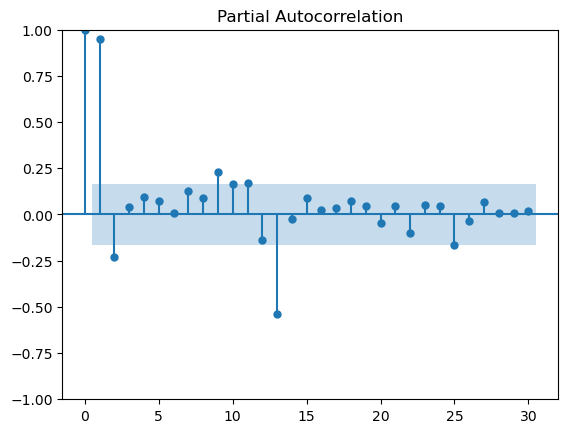

In [26]:
#graphe d'autocorrelation et l'autocorrelation partielle
plot_acf(df, lags=48);
plot_pacf(df, lags=30);

<ul>
    <li>Le premier graphe (ACF)nous permet de mesurer la corrélation entre une observation de la série temporelle et une observation à un pas de temps antérieur, avec toutes les observations intermédiaires prises en compte. Ce qui est crucial pour <b> déterminer le paramètre p </b>pour un modèle AR(p) (AutoRegressive). En identifiant jusqu'à quel lag les corrélations restent significatives au-dessus des seuils de confiance, on peut déduire le nombre optimal de termes autoregressifs à intégrer dans le modèle. Dans notre cas, ce nombre est environ<b> 14</b>. Mais pour affirmer la méthode grid search sera utilisée
    </li>
    <li>Le deuxième graphe, le tracé PACF (Partial Autocorrelation Function), diffère du tracé ACF car il  mesure la corrélation entre une observation de la série temporelle et une observation à un pas de temps antérieur, mais en éliminant les corrélations dues aux observations intermédiaires.  Dans notre cas, le tracé PACF sera utilisé <b> pour déterminer q </b>, qui est égal à peu près <b>3</b>. Cela est fait En identifiant jusqu'à quel lag les corrélations restent significatives au-dessus des seuils de confiance. Cependant, pour confirmer ce choix, une méthode de recherche en grille (grid search) sera utilisée pour sélectionner le meilleure q. </li>
</ul>

<h3>Entrainemet sur toute la série et analyse des résidus</h3>

In [35]:
#Entrainement du modèle sur toute la série df et avec order=(13,2,1) trouvé par la méthode de grid search 
arima = ARIMA(df, order=(13,2,1))
model=arima.fit()

#afficher le summary du modèle
print(model.summary())

#prédiction de la série avec ARIMA
predictions = model.predict()

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                ARIMA(13, 2, 1)   Log Likelihood                -554.419
Date:                Sun, 28 Jan 2024   AIC                           1138.838
Time:                        16:34:19   BIC                           1183.176
Sample:                    01-01-1949   HQIC                          1156.855
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3214      0.123     -2.622      0.009      -0.562      -0.081
ar.L2         -0.2355      0.113     -2.075      0.038      -0.458      -0.013
ar.L3         -0.1549      0.138     -1.120      0.2

<font color='blue'><b>Model: ARIMA(13, 2, 1) :</b></font> Il s'agit d'un modèle ARIMA avec 13 retards (lags) pour la partie autorégressive (AR), un ordre de différenciation de 2 (d), et un lag pour la partie moyenne mobile (MA).

<font color='blue'><b>arima.fit():</b></font>est utilisé pour entrainer le modele.

<font color='blue'><b> model.predict():</b></font>pour faire des prédictions.

<font color='blue'><b> Log Likelihood , AIC , BIC ,HQIC:</b></font>Sont des indicateurs de la qualité de l'ajustement du modèle.

<font color='blue'><b> Sigma2 :</b></font> La variance de l'erreur du modèle, ici 123.4661.

<font color='blue'><b>ar.L1 : </b></font> Coefficient du premier décalage autoregressif. Cela mesure l'effet de la valeur de la série temporeelle au temps (t-1) sur la valeur actuelle au temps (t).

<font color='blue'><b>ar.L2 : </b></font>Coefficient du deuxième décalage autoregressif. Cela mesure l'effet de la valeur de la série au temps (t-2) sur la valeur actuelle.Et ainsi de suite.

<font color='blue'><b>pour coef 1:</b></font>Ce coefficient négatif indique une relation inverse entre la valeur de la série temporelle au temps (t-1) et la valeur au temps (t). Autrement dit, si la valeur au temps (t-1) était élevée, elle aurait tendance à entraîner une baisse de la valeur au temps (t), et vice versa.

<font color='blue'><b>Statistique Z (z) :</b></font> Il s'agit du ratio du coefficient à son erreur standard. Des valeurs absolues plus élevées indiquent une plus grande significativé statistique du coefficient.

<font color='blue'><b>P>|z| (valeur-p) : </b></font>Cette colonne indique la probabilité d'observer une statistique Z si(p en dessous de 0.05) cela indique que ce coefficient est statistiquement significatif.

<font color='blue'><b>Intervalle de confiance à 95% [0.025 - 0.975] :</b></font>Cette colonne donne l'intervalle de confiance pour chaque coefficient. Pour ar.L1, cet intervalle va de -0.562 à -0.081, signifiant qu'on est assez confiant que la véritable valeur du coefficient se situe dans cet intervalle.

<font color='blue'><b>Ljung-Box Test (Q):</b></font>Ce test vérifie l'autocorrélation résiduelle à différents lags. Une valeur de Prob(Q) élevée (proche de 1) suggère l'absence d'autocorrélation significative dans les résidus, <b>indiquant que le modèle s'ajuste bien aux données.</b> Dans notre cas, une Prob(Q) de 0.87 indique que les résidus sont bien aléatoires.

<font color='blue'><b>Jarque-Bera Test (JB):</b></font>Ce test évalue si les résidus ont une distribution normale. Une Prob(JB) faible (généralement < 0.05) suggère que les résidus ne suivent pas une distribution normale. Dans notre cas, avec une Prob(JB) de 0.01, il semble que les résidus ne soient pas normalement distribués.
Hétéroscédasticité (H):


<font color='blue'><b>Prob(H) (bilateral) :</b></font>Ce test évalue si les variances des résidus sont constantes (homoscédasticité) ou non (hétéroscédasticité). Une Prob(H) faible indique une hétéroscédasticité significative. Avec une Prob(H) de 0.00, cela suggère que les variances des résidus ne sont pas constantes dans le temps.


<font color='blue'><b>Skew (Asymétrie):</b></font>Valeur de -0.01 Il s'agit d'une mesure de l'asymétrie des résidus. Une valeur proche de 0 indique une symétrie autour de la moyenne. Dans notre cas, la valeur de -0.01 indique une très légère asymétrie.


<font color='blue'><b>Kurtosis:</b></font>Valeur de 4.25 Cette mesure évalue l'aplatissement de la distribution des résidus. Une valeur supérieure à 3 indique une distribution plus pointue que la normale (distribution leptokurtique). Avec un kurtosis de 4.25, nos résidus ont une distribution plus concentrée autour de la moyenne avec des queues plus lourdes que celles d'une distribution normale.


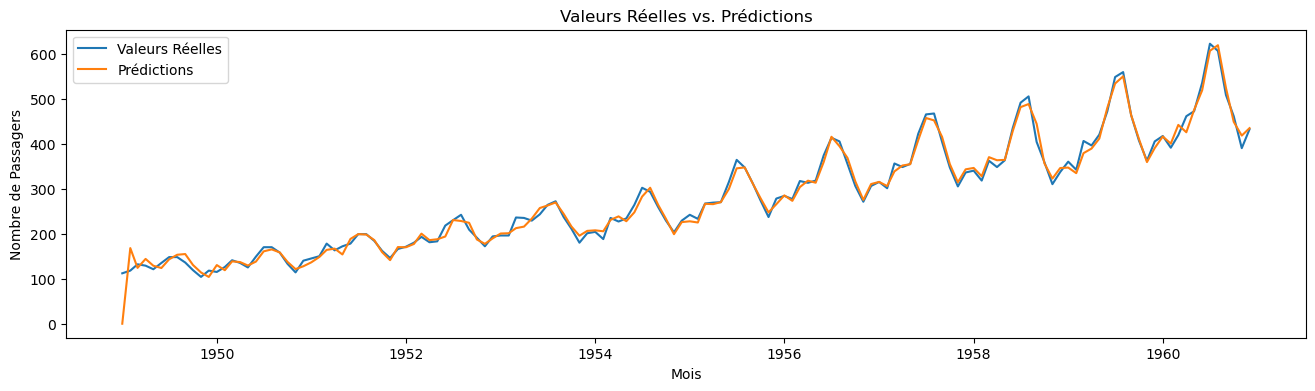

RMSE: 15.20626517208556


In [36]:
# Affichage du plot des valeurs réelles et des prédictions
plt.figure(figsize=(16,4))
plt.plot(df, label='Valeurs Réelles')
plt.plot(predictions,  label='Prédictions')
plt.title('Valeurs Réelles vs. Prédictions')
plt.xlabel('Mois')
plt.ylabel('Nombre de Passagers')
plt.legend()
plt.show()
# Calcul du RMSE
rmse = np.sqrt(mean_squared_error(df, predictions))
print(f'RMSE: {rmse}')

Le graphique montre une comparaison entre les valeurs réelles et les prédictions du nombre de passagers de 1950 à 1960, indiquant <b>un modèle prédictif assez précis </b>vu la proximité des deux lignes. Les tendances des hausses et des baisses sont similaires pour les prédictions et les valeurs réelles. <b>Le RMSE</b> (erreur quadratique moyenne) est de <b>15.26</b>, ce qui suggère que les prédictions dévient en moyenne de 15.26 passagers par rapport aux valeurs réelles, ce qui peut être considéré comme une bonne performance de prédiction.

<b><font color='red'>conclusion:</font> Cela indique généralement que le modèle est bon pour cette série de données spécifique.</b>

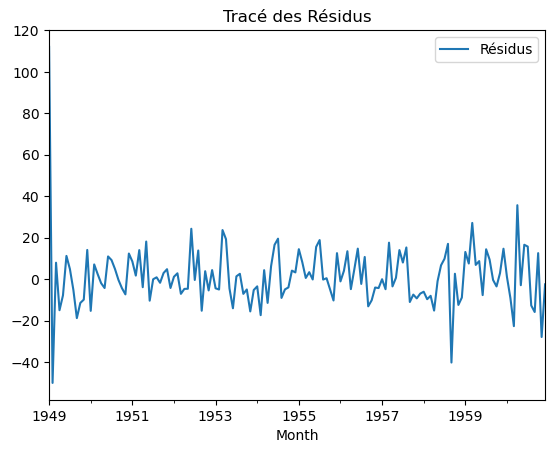

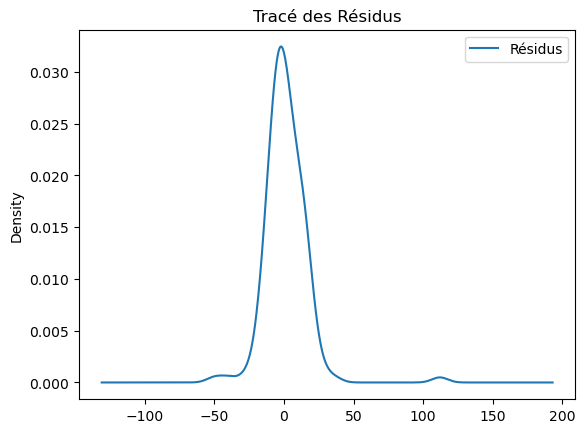

                0
count  144.000000
mean     1.213848
std     15.210646
min    -50.031131
25%     -6.279179
50%     -0.088250
75%      8.602159
max    112.000000


In [37]:
#Analyse des résidus
residuals = pd.DataFrame(model.resid)
residuals.plot()
plt.legend(['Résidus'])
plt.title('Tracé des Résidus')
plt.show()
# density plot des résidus
residuals.plot(kind='kde')
plt.legend(['Résidus'])
plt.title('Tracé des Résidus')
plt.show()
# statistiques des résidus
print(residuals.describe())

<ul><li>Le premier graphique montre le tracé des résidus d'une prédiction de temps contre les valeurs réelles, de 1949 à 1960. <b>Les résidus sont les écarts entre les prédictions et les valeurs réelles</b>. Idéalement, ces résidus devraient être aléatoires et centrés autour de zéro, indiquant que le modèle ne présente pas de biais systématique. Dans ce cas,<b> les résidus fluctuent autour de zéro sans tendance claire ou motifs répétitifs, ce qui est bon signe<b>.</li><br>
    <li>Le deuxième graphique est une représentation de la densité des résidus, où on observe une courbe en forme de cloche centrée autour de zéro, suggérant<b> une distribution normale des erreurs.</b> Cela signifie que le modèle fait des erreurs de manière équilibrée dans les deux sens (ni sous-estimation ni sur-estimation constante) et qu'il est généralement bien ajusté, malgré quelques erreurs extrêmes qui sont normales dans les prédictions statistiques.</li><br>
    <li> Pour les informations qui se trouve au dessous du deuxième graphe sont un résumé statistique des résidus d'un modèle de prédiction. Ci dessous la signification de chaque valeur:<br>
        <font color='blue'><b>count:  </b></font>Le nombre total de résidus analysés, ici 144 observations.<br>
            <font color='blue'><b>mean: </b></font>La moyenne des résidus, qui est de 1.213848. Cela indique que, en moyenne, les prédictions dépassent les valeurs réelles de 1.213848, ce qui est relativement proche de zéro et suggère un faible biais dans le modèle.<br>
      <font color='blue'><b>std:  </b></font>L'écart-type des résidus, qui est de 15.210646. Cela mesure la dispersion des résidus par rapport à la moyenne ; ici, il montre que les résidus varient en moyenne de 15.21 unités par rapport à la moyenne des résidus.<br>
      <font color='blue'><b>min: </b></font> La valeur minimale des résidus, qui est de -50.031131. C'est l'erreur la plus importante où le modèle a sous-estimé la valeur réelle.<br>
      <font color='blue'><b>25%: </b></font> Le premier quartile, où 25% des résidus sont inférieurs à -6.279179. Cela signifie que 25% des erreurs de prédiction sont d'une sous-estimation d'au moins 6.279179.<br>
      <font color='blue'><b>50%: </b></font> La médiane des résidus, aussi connue sous le nom de 2e quartile, où 50% des résidus sont inférieurs à -0.088250. C'est la valeur médiane des résidus, et dans ce cas, elle est très proche de zéro, ce qui est idéal.<br>
      <font color='blue'><b>75%:  </b></font>Le troisième quartile, où 75% des résidus sont inférieurs à 8.602159. Cela indique qu'une majorité des résidus sont dans une plage raisonnable de la valeur réelle.<br>
      <font color='blue'><b>max: </b></font> La valeur maximale des résidus, qui est de 112.000000. C'est l'erreur la plus importante où le modèle a surestimé la valeur réelle.
</li></ul>

<h3>Entrainemet sur l'ensemble de train et prédiction sur l'ensemble de test</h3>

In [38]:
# division de la série en train et test ( 80% , 20% )
X = df.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [i for i in train]

In [39]:
# walk-forward validation 
predictions = list()
for t in range(len(test)):
    #entrainement du modèle
    model = ARIMA(history, order=(13,2,1))
    model_fit = model.fit()
    #prédiction de la prochaine valeur
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

La procédure de validation en marchant (walk-forward validation) pour tester un modèle ARIMA sur un ensemble de données de test. À chaque itération, le modèle est entraîné sur l'historique des données actuel, il fait une prédiction pour le point de données suivant, puis cette valeur réelle est ajoutée à l'ensemble de données historiques pour l'entraînement de la prochaine prédiction.

<h3>Evaluation du modèle</h3>

In [40]:
#affichage des valeurs des prédiction VS les valeurs réelles
pd.DataFrame({'predicted': np.array(predictions).flatten(),'expected': test.flatten()}).head()
#df1 = pd.DataFrame(df1)
#df1.head()

,predicted,expected
0,492.606690,505.0
1,447.480859,404.0
2,356.872577,359.0
3,326.042252,310.0
4,341.209375,337.0


Ce tableau compare les prédictions du modèle avec les valeurs attendues. Les prédictions montrent de <b>petites différences par rapport aux valeurs réelles</b>, ce qui suggère une <b>performance solide du modèle</b>. Ces résultats soutiennent la fiabilité du RMSE, soulignant que les prévisions du modèle sont cohérentes avec les données observées, renforçant ainsi sa précision.

Train RMSE: 14.859 
Test RMSE: 15.206



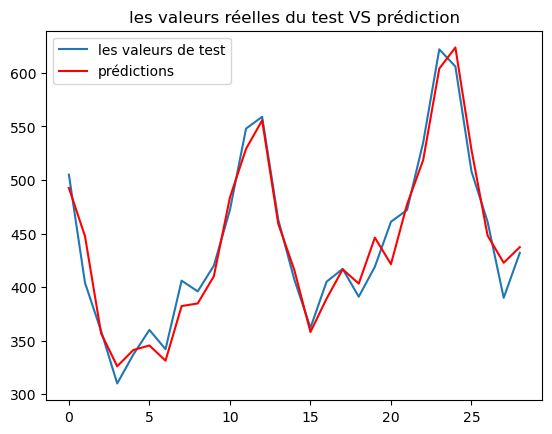

In [41]:
# Evaluer le modèle 
#calcul du rmse
arima_model = ARIMA(train, order=(13,2,1))
arima_fit = arima_model.fit()

# Prédictions sur l'ensemble d'entraînement
train_predictions = arima_fit.predict()

# Calculer RMSE sur l'ensemble d'entraînement
rmse_train_arima = m.sqrt(mean_squared_error(train, train_predictions))
print('Train RMSE: %.3f ' % (rmse_train_arima))
# Calculer RMSE sur l'ensemble de test
rmse_test_arima = m.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
print()
# plot des prédiction VS test
plt.plot(test,label="les valeurs de test")
plt.plot(predictions,label="prédictions", color='red')
plt.title('les valeurs réelles du test VS prédiction')
plt.legend()
plt.show()

<ul><li>Le graphique compare les valeurs réelles de test et les prédictions d'un modèle, montrant une tendance similaire malgré quelques écarts , ce qui <b>reflète une capacité de prédiction correcte <b>avec une certaine erreur(15.206),mais n'influence pas sur notre modèle.</li>
<li>Le modèle présente <b>une précision élevée sur les données d'entraînement, avec un RMSE de 14.859</b>, ainsi que sur les données de test, avec <b>un RMSE de 15.206.</b><b> La proximité des valeurs entre les ensembles d'entraînement et de test  indique une bonne capacité de généralisation du modèle aux données inconnues.</b>.</li></ul>

In [58]:
predict_arima=np.empty_like(df, dtype=float)
predict_arima[:,:]=np.nan
predict_arima[len(train):len(df),0]=predictions #prediction sur test

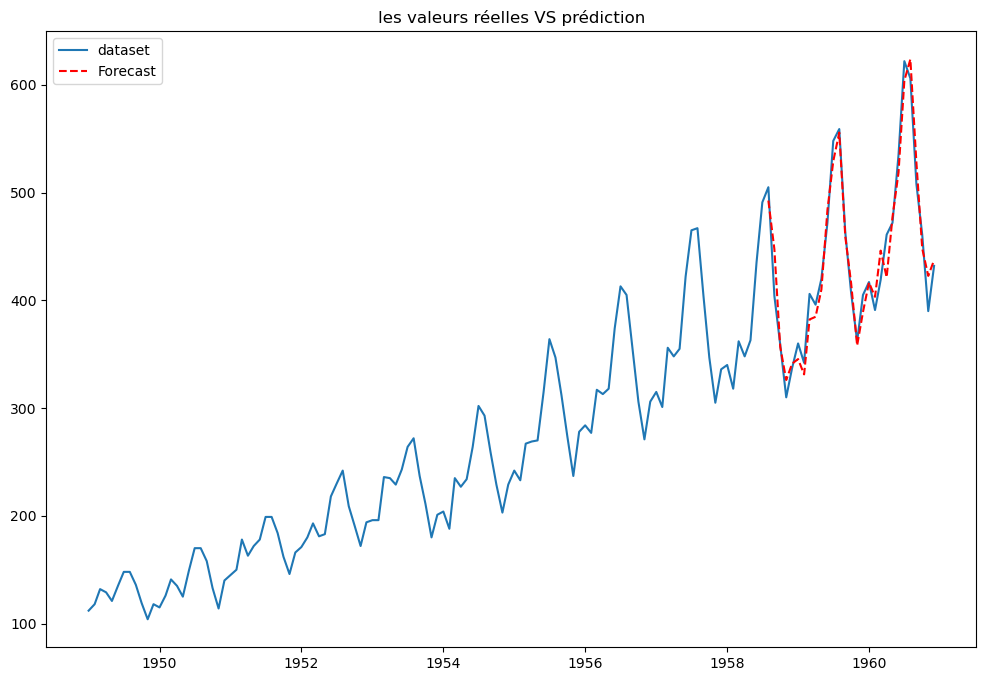

In [59]:
#tracé de la série et les prédictions du test
plt.figure(figsize=(12,8))
plt.plot(df.index,df.values, label='dataset')
plt.plot(df.index,predict_arima, label='Forecast', color='red',linestyle='dashed')
plt.title('les valeurs réelles VS prédiction')
plt.legend()
plt.show()

Ce graphique présente les données réelles (en bleu) et les prévisions (en pointillés rouges) pour une série temporelle s'étendant de 1950 à 1960. Les prévisions commencent vers la fin de la série temporelle .Ces prévisions semble superposer étroitement aux données réelles d'une série temporelle, <b>indiquant une bonne précision du modèle dans la capture des tendances et des cycles des données.</b>

<h3>Entrainemet du modèle sur toute la série et prédiction des 30 mois suivants </h3>

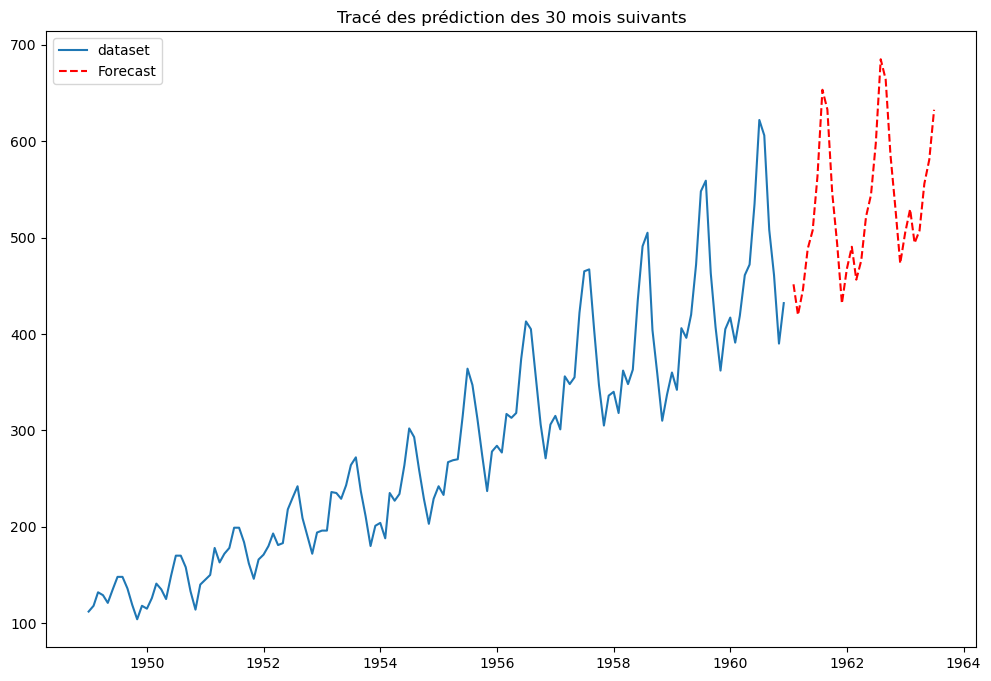

In [42]:
# Faire des predictions pour les 30 mois à venir
arima = ARIMA(df, order=(13,2,1))
model=arima.fit()

forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=30, freq='M')#df.index[-1] car on commence du dernier index
forecast = model.get_forecast(steps=30).predicted_mean
plt.figure(figsize=(12,8))
plt.plot(df.index,df.values, label='dataset')
#plt.plot(X_test, label='Test', color='yellow')
plt.plot(forecast_index,forecast, label='Forecast', color='red',linestyle='dashed') 
plt.title("Tracé des prédiction des 30 mois suivants")
plt.legend()
plt.show()

Le graphique affiche la progression des données historiques en bleu et projette des prédictions pour les 30 mois futurs en pointillés rouges, prolongeant la série au-delà du dernier point de donnée enregistré.<b> Les prévisions reproduisent non seulement la tendance ascendante des données historiques mais aussi leurs motifs saisonniers(serie non stationaire)</b>, laissant entrevoir que, <b>selon le modèle ARIMA, la séquence observée jusqu'à présent devrait persister avec des variations périodiques comparables aux cycles précédents</b>.

<h3>Entrainemet du modèle sur toute la série et prédiction des 30 mois suivants et tracé des intervalles de confiance avec alpha=5%</h3>

In [43]:
#train  du model sur df
model = ARIMA(df, order=(13,2,1))
model_fit = model.fit()
forecast_steps = 30  # Nombre d'étapes de prévision
forecast = model_fit.get_forecast(steps=forecast_steps)
# Intervalles de confiance pour les prédictions avec alpha = 5%
confidence_intervals = forecast.conf_int(alpha=0.05)

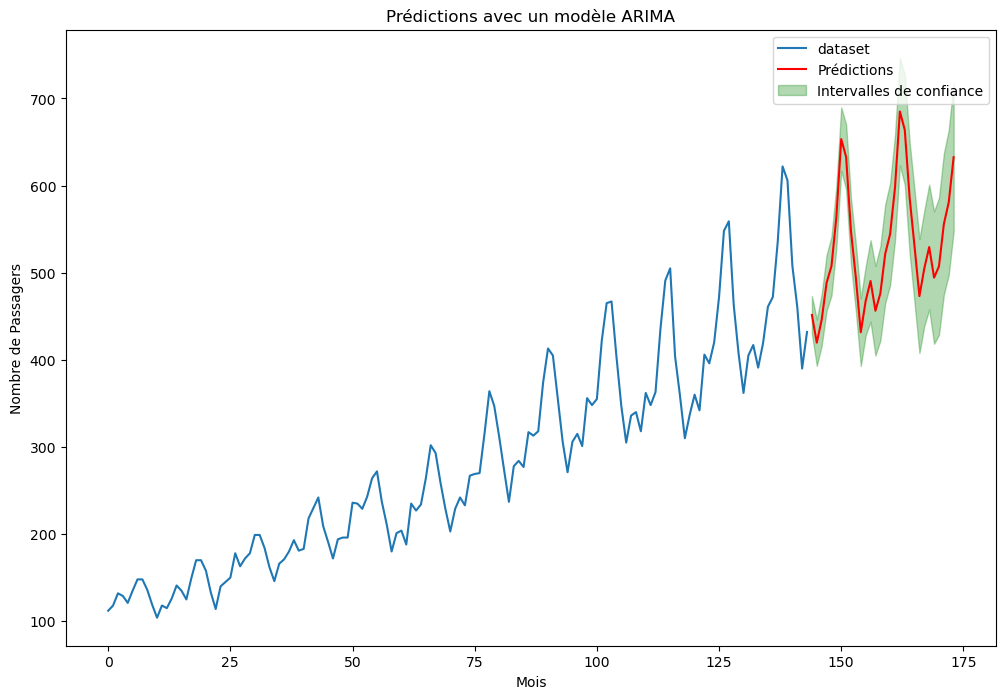

In [62]:
#Tracé de la série et la prédiction des 30 mois suivants 
plt.figure(figsize=(12, 8))
plt.plot(df.values, label='dataset')
plt.plot(np.arange(len(df), len(df) + forecast_steps), forecast.predicted_mean, color='red', label='Prédictions')
#lower Passengers et upper Passengers représentent bornne inf et sup de notre intervalle de confiance
plt.fill_between(np.arange(len(df), len(df) + forecast_steps),
                 confidence_intervals['lower Passengers'], confidence_intervals['upper Passengers'],
                 color='green', alpha=0.3, label='Intervalles de confiance')
plt.title('Prédictions avec un modèle ARIMA')
plt.xlabel('Mois')
plt.ylabel('Nombre de Passagers')
plt.legend()
plt.show()


Ce graphique illustre les résultats d'un modèle ARIMA, montrant le nombre de passagers (sur l'axe des y) au fil des mois (sur l'axe des x). La ligne bleue représente les données historiques (le 'dataset'), tandis que la ligne rouge indique les prédictions du modèle. Les zones ombrées en vert représentent les intervalles de confiance, qui donnent une estimation de l'incertitude autour des prédictions. Les prédictions suivent la tendance et la saisonnalité des données historiques, et<b> les intervalles de confiance s'élargissent à mesure que l'on s'éloigne dans le futur, ce qui indique une plus grande incertitude dans les prévisions à long terme.</b>

<h3>GRID SEARCH TO FIND THE BEST ORDER FOR ARIMA MODEL (p,d,q)</h3>

In [63]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out-of-sample error
    rmse = m.sqrt(mean_squared_error(test, predictions))
    return rmse

La fonction, evaluate_arima_model, évalue les performances d'un modèle ARIMA pour un ordre donné (p,d,q) en divisant les données en un ensemble d'entraînement et un ensemble de test. Le modèle est entraîné sur l'ensemble d'entraînement, puis utilisé pour faire des prédictions sur l'ensemble de test. Ensuite, la racine de l'erreur quadratique moyenne (RMSE) est calculée pour mesurer l'écart entre les prédictions du modèle et les données réelles de l'ensemble de test. <b>Cette fonction permet de comparer différentes combinaisons d'ordres ARIMA et de choisir le modèle qui donne la meilleure performance en termes de RMSE.</b>

In [64]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

La fonction, evaluate_models, cherche à évaluer différentes combinaisons de valeurs pour p, d et q, qui sont les paramètres de l'ordre ARIMA.<b> Elle parcourt les différentes combinaisons de ces paramètres, entraîne des modèles ARIMA avec chaque combinaison, mesure le RMSE pour chaque modèle, et sélectionne la meilleure combinaison de paramètres qui donne le plus faible RMSE.</b>

In [65]:
# a ne pas exécuter :)
import time

p_values = [ i for i in range(20)]
d_values = range(0, 3)
q_values = range(0, 15)

start_time = time.time()
#evaluate_models(df.values, p_values, d_values, q_values)
end_time = time.time()
execution_time = end_time - start_time

# Affichez le temps d'exécution
print(f"Le temps d'exécution total est de {execution_time} secondes.")

Le temps d'exécution total est de 0.0 secondes.


<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">FORECASTING AVEC LSTM</h4>

<h4 >ENTRAINEMENT DU MODEL</h4>

In [193]:
#les bibs de lstm model
from tensorflow.keras.layers import LSTM


from keras.optimizers import Adam

In [194]:
#Création du modèle avec deux couches cachées

model=Sequential()
model.add(LSTM(units=64,activation='relu',return_sequences=True,input_shape=(None, window)))
model.add(LSTM(units=32,activation='relu'))
model.add(Dense(units=1, activation='linear'))
print(model.summary())

Model: "sequential_106"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_208 (LSTM)             (None, None, 64)          21760     
                                                                 
 lstm_209 (LSTM)             (None, 32)                12416     
                                                                 
 dense_110 (Dense)           (None, 1)                 33        
                                                                 
Total params: 34,209
Trainable params: 34,209
Non-trainable params: 0
_________________________________________________________________
None


model.add( LSTM( units, activation='', input_shape,return_sequences=True ) )<br>
<font color='blue'><b>units: </b></font> nombre de neurones dans la couche.<br>
<font color='blue'><b>activation: </b></font> fonction d'activation.<br>
<font color='blue'><b>input_shape=(None, window) :</b></font>  spécifie la forme de l'entrée avec un nombre indéterminé d'instants temporels (None) (la longueur de la séquence peut être différente pour différents échantillons.) et une dimension window pour chaque instant temporel.(la fenêtre de temps que le modèle utilise pour faire ses prédictions.)<br>
<font color='blue'><b>return_sequences=True: </b></font> indique que la couche doit renvoyer la séquence complète pour chaque pas de temps, plutôt que seulement la sortie du dernier pas de temps.

Le modèle LSTM séquentiel est créé, qui est une pile linéaire de couches, défini avec <b>2 couches cachées </b> et <b>une couche de sortie. Le modèle est entraîné sur les données d'entraînement.</b><br>


    
    


<ul>
<li>La 1ère couche cachée: LSTM, avec 64 neurones, une fonction d'activation 'relu' et 21760 paramètres
</li>
<li>   
La 2ème  couche cachée: LSTM, avec 32 neurones, une fonction d'activation 'relu' et 12416  paramètres.
</li>  
<li>
La couche de sortie est  une couche Dense( nous avons besoin d'une couche dense pour effectuer une transformation linéaire des caractéristiques extraites par les LSTM en une valeur de sortie continue.) avec une seule unité, une activation linéaire et 33 paramètres.
    </li>
   
 Cette couche est utilisée pour la régression, car elle prédit une valeur continue. (Pour les tâches de régression, une activation linéaire est couramment utilisée à la couche de sortie.) </ul>

In [195]:
# Compilation du  modèle

model.compile(optimizer='adam', loss='mean_squared_error')

# définir le early_stop pour stoper l'entrainement 

early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

<font color='red'><b>Optimizer: </b></font>
L'optimiseur est un algorithme qui ajuste les poids du réseau neuronal pendant l'entraînement. L'objectif est de minimiser la fonction de perte (<font color='red'>Loss Function</font>), qui mesure la différence entre les prédictions du modèle et les valeurs réelles.Dans ce cas, 'mean_squared_error' est utilisé, ce qui signifie que la fonction de perte est l'erreur quadratique moyenne. (Pour les tâches de régression, cette fonction est couramment utilisée. Elle calcule la moyenne des carrés des différences entre les prédictions et les vraies valeurs.)
<b>'adam'</b> est un optimiseur populaire dans le domaine des réseaux neuronauxen raison de son adaptation automatique du taux d'apprentissage et de son efficacité. 

<font color='red'><b>EarlyStopping</b>:</font> L'arrêt anticipé est une technique utilisée pendant l'entraînement pour éviter le surajustement du modèle. Le surajustement se produit lorsque le modèle s'adapte trop bien aux données d'entraînement et ne généralise pas bien sur de nouvelles données. L'idée de l'arrêt anticipé est d'arrêter l'entraînement lorsque la performance du modèle sur l'ensemble de validation cesse de s'améliorer.

<font color='green'><b>monitor='loss' :</b></font> L'arrêt anticipé se base sur la perte d'entraînement (loss).<br>
<font color='green'><b>patience=5 : </b></font>Si la perte d'entraînement ne s'améliore pas pendant 5 époques consécutives, l'entraînement est arrêté.  Cela permet d'optimiser l'efficacité de l'entraînement en évitant de gaspiller des ressources lorsque les performances du modèle stagnent.<br>
<font color='green'><b>verbose=1 : </b></font>Affiche des messages d'informations pendant l'entraînement pour suivre le processus.</p>

In [196]:
# Définir la taille d'entraînement en 80% train et 20% test
train_size = int(len(df) * 0.8)

#division de la serie en train et test
X_train=X_data[0:train_size,:]
X_test=X_data[train_size:len(X_data),:]
y_train=y_data[0:train_size]
y_test=y_data[train_size:len(y_data)]

print("dim de X_train :",X_train.shape)
print("dim de y_train :",y_train.shape)
print("dim de X_test :",X_test.shape)
print("dim de y_test :",y_test.shape)

dim de X_train : (115, 20)
dim de y_train : (115,)
dim de X_test : (9, 20)
dim de y_test : (9,)


In [197]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

remodélisation des données d'entraînement (X_train) et de test (X_test) pour qu'elles correspondent à la forme attendue par les couches LSTM dans notre modèle.



In [198]:
# Entraîner le modèle avec EarlyStopping
#callbacks=[early_stop],
history1=model.fit(X_train, y_train, epochs=400, batch_size=8, validation_data=(X_test, y_test), verbose=1,shuffle=False)

Epoch 1/400
15/15 [==============================] - 3s 35ms/step - loss: 0.1338 - val_loss: 0.4510
Epoch 2/400
15/15 [==============================] - 0s 8ms/step - loss: 0.0853 - val_loss: 0.2651
Epoch 3/400
15/15 [==============================] - 0s 7ms/step - loss: 0.0285 - val_loss: 0.0507
Epoch 4/400
15/15 [==============================] - 0s 6ms/step - loss: 0.0126 - val_loss: 0.0443
Epoch 5/400
15/15 [==============================] - 0s 6ms/step - loss: 0.0100 - val_loss: 0.0339
Epoch 6/400
15/15 [==============================] - 0s 7ms/step - loss: 0.0087 - val_loss: 0.0285
Epoch 7/400
15/15 [==============================] - 0s 7ms/step - loss: 0.0081 - val_loss: 0.0276
Epoch 8/400
15/15 [==============================] - 0s 7ms/step - loss: 0.0080 - val_loss: 0.0260
Epoch 9/400
15/15 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.0249
Epoch 10/400
15/15 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0237
Epoch 11

<b>model.fit</b> est utilisée pour entraîner le modèle de réseau de neurones.

<font color='green'><b>X_train:</b></font> représente les données d'entrée (features) d'entraînement.<br><br>
<font color='green'><b>y_train:</b></font> représente les étiquettes (labels) correspondantes aux données d'entraînement.<br><br>
<font color='green'><b>epochs :</b></font> Le nombre d'epochs détermine combien de fois le modèle va traverser l'ensemble complet des données d'entraînement.Dans notre cas on a 400 itérations.<br><br>
<font color='green'><b>batch_size :</b></font> définit le nombre d'échantillons d'entraînement utilisés pour mettre à jour les poids du modèle à chaque itération d'entraînement. Dans ce cas, le modèle est mis à jour après chaque lot de 8 échantillons.<br><br>
<font color='green'><b>validation_data :</b></font> C'est l'ensemble de données (X_test, y_test) sur lequel le modèle est évalué à la fin de chaque epoch. Cela permet de surveiller la performance du modèle sur un ensemble de données distinct de celui d'entraînement, aidant ainsi à identifier le surajustement (overfitting).<br><br>
<font color='green'><b>verbose :</b></font> Ce paramètre contrôle le niveau de détails des informations affichées pendant l'entraînement. verbose=1 affiche une barre de progression avec des informations détaillées, tandis que verbose=0 n'affiche aucune information pendant l'entraînement.<br><br>
<font color='green'><b>shuffle :</b></font>Ce paramètre détermine si les données d'entraînement doivent être mélangées avant chaque epoch. Ici, shuffle=False indique que les données ne sont pas mélangées.

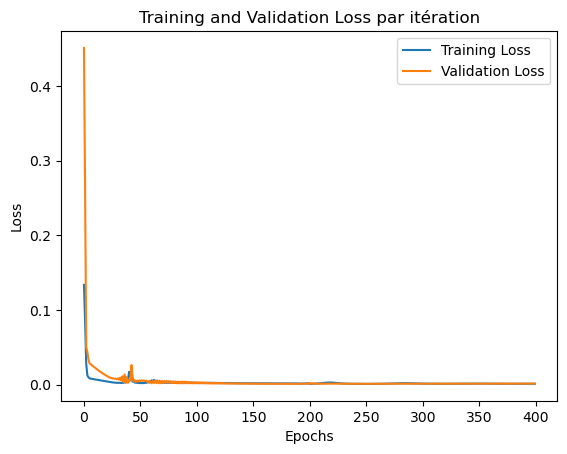

In [199]:
# Liste des valeurs de perte sur l'ensemble d'entraînement et validation
losses = history1.history['loss']  
val_losses = history1.history['val_loss']
# Tracer la courbe des pertes
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss par itération')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

 Le graphique montre que les pertes d'entraînement et de validation diminuent et se stabilisent, indiquant que<b> le modèle apprend correctement</b>. La convergence des deux courbes autour de l'époque 50 et leur maintien proche l'une de l'autre suggèrent un <b>bon équilibre entre l'apprentissage sur les données d'entraînement et la généralisation sur les données non vues (validation)</b>, sans signes de surapprentissage.

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor

In [190]:
def grid_search(model_type, param_grid):
    regressor = KerasRegressor(build_fn= model_type, verbose=1)
    grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

def evaluate_model(model, X_test, y_test, sc, trainX_shape):
    testPredict = model.predict(X_test)
    testPredict = testPredict.reshape(-1, 1)
    testPredict = sc.inverse_transform(testPredict)
    y_test = sc.inverse_transform([y_test])

    rmse = m.sqrt(mean_squared_error(y_test[0,:], testPredict[:,0]))
    return rmse
def model_():
    #la creation du modèle 
    model_=Sequential()
    model_.add(LSTM(units=64,activation='relu',return_sequences=True,input_shape=(None, window)))
    model_.add(LSTM(units=32,activation='relu'))
    #model.add(LSTM(units=32))
    model_.add(Dense(units=1, activation='linear'))
    model_.compile(optimizer='adam', loss='mean_squared_error')
    return model_

<font color='blue'> <b>grid_search(model_type, param_grid):</b></font>La fonction "grid_search" effectue une recherche exhaustive des hyperparamètres pour un modèle donné en utilisant une grille spécifiée pour déterminer les valeurs optimales des hyperparamètres d'un modèle.

<font color='blue'><b> regressor = KerasRegressor(build_fn= model_type, verbose=1):</b></font> définit un estimateur de régression pour les tâches d'apprentissage automatique où l'objectif est de prédire une valeur numérique continue. Elle utilise KerasRegressor, une interface de Keras avec la bibliothèque de machine learning scikit-learn. La fonction model_type passée en tant que build_fn sert à spécifier la structure et la configuration du modèle de réseau de neurones à construire. Le paramètre verbose=1 indique que pendant l'entraînement du modèle, des informations détaillées seront affichées .

<font color='blue'><b>grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error'):</b></font>La va
riable "grid_search" représente une instance de la recherche exhaustive des hyperparamètres en utilisant une grille spécifiée ("GridSearchCV"), configurée pour optimiser un estimateur de régression Keras ("regressor") en ajustant ses hyperparamètres selon la grille "param_grid" tout en utilisant une validation croisée à 3 plis(La validation croisée à 3 plis est une technique d'évaluation de modèle où l'ensemble de données est divisé en trois parties égales, utilisant deux plis pour l'entraînement et un pli pour le test, répétée trois fois pour évaluer la performance moyenne du modèle.) et en évaluant les modèles en fonction de l'erreur quadratique moyenne négative (scoring='neg_mean_squared_error').

<font color='blue'><b>grid_search.fit(X_train, y_train):</b></font> exécution de la recherche d'hyperparamètres avec la méthode fit sur les données d'entraînement (X_train, y_train) pour trouver la meilleure combinaison d'hyperparamètres.

<font color='blue'><b>return grid_search.best_params_:</b></font>la fonction renvoie la combinaison d'hyperparamètres qui a donné les meilleurs résultats de performance .


In [191]:
# Definr les parametres de grid
param_grid = {'batch_size' : [8, 16, 32, 64],
              'epochs' : [100, 200, 300, 400]}

# Train and evaluate stacked LSTM
#best_params = grid_search(model_, param_grid)

Epoch 1/100
10/10 [==============================] - 3s 6ms/step - loss: 0.2165
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1834
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1381
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0775
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0202
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0164
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0129
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0118
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0109
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 11/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 12/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 13/100
10/10 [=================

In [192]:
best_params

{'batch_size': 8, 'epochs': 400}

<h4>Evaluation du modèle</h4>

In [200]:
# Évaluer le modèle sur l'ensemble de test et train
loss1=model.evaluate(X_train,y_train)
print(f"la perte de train est: {loss1}")
loss = model.evaluate(X_test, y_test)
print(f"perte de test est: {loss}")

4/4 [==============================] - 0s 4ms/step - loss: 6.2185e-04
la perte de train est: 0.0006218490307219326
1/1 [==============================] - 0s 25ms/step - loss: 0.0015
perte de test est: 0.0015466805780306458


Le modèle montre une <font color='red'>bonne performance</font> avec une <b>faible perte sur l'ensemble d'entraînement ( 0.00062)</b> et une <b>perte</b> légèrement plus élevée mais toujours relativement <b>basse sur l'ensemble de test 0.00154).</b> Cela suggère que <b>le modèle a bien appris les données d'entraînement et généralise bien sur de nouvelles données.</b>

In [201]:
#Evaluer le modèle avec rmse 
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Reshape des prédictions pour les rendre compatibles avec y_test
trainPredict = trainPredict.reshape(-1, 1)
testPredict = testPredict.reshape(-1, 1)

#Faire des prédictions sur l'ensemble d'entraînement et l'ensemble de test en revenant à l'échelle réelle.
trainPredict = sc.inverse_transform(trainPredict)
y_train= sc.inverse_transform([y_train])
testPredict = sc.inverse_transform(testPredict)
y_test = sc.inverse_transform([y_test])

1/1 [==============================] - 0s 24ms/step


In [202]:
#RMSE avec les valeurs réelles
rmse_train_lstm = m.sqrt(mean_squared_error(y_train[0,:], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (rmse_train_lstm))

rmse_test_lstm = m.sqrt(mean_squared_error(y_test[0,:], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (rmse_test_lstm))

Train Score: 12.92 RMSE
Test Score: 20.37 RMSE


Un "Train Score" de 13.34 RMSE et un "Test Score" de 21.09 RMSE suggèrent que le modèle réalise des prédictions précises sur l'ensemble d'entraînement et montre une performance acceptable sur l'ensemble de test. Cela implique que le modèle, tout en étant fiable sur les données connues, conserve une efficacité raisonnable lorsqu'il est confronté à de nouvelles données.

<h3>Prédiction des valeurs de train et test</h3>

In [203]:
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan

trainPredictPlot[window:len(trainPredict)+window, :] = trainPredict

testPredictPlot[len(trainPredict)+window:len(df), :] = testPredict



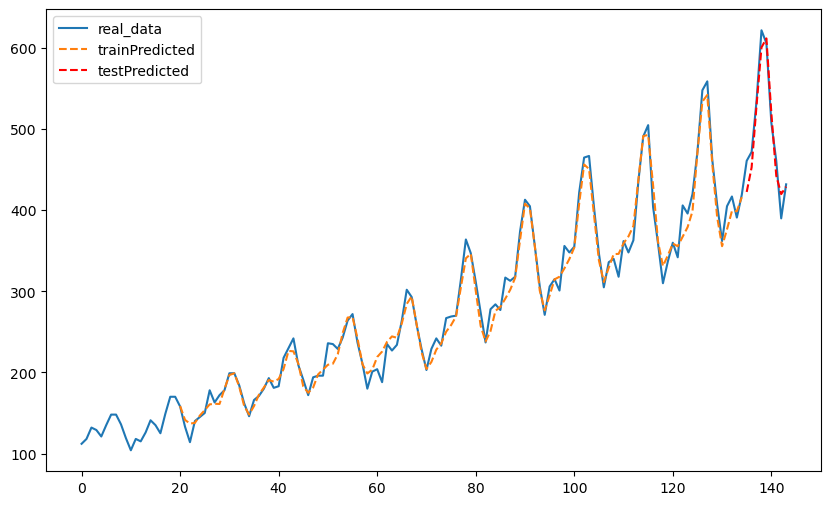

In [204]:
#plot de la series et  les prédiction
#trainPredictPlot[1:len(trainPredict)+1, :] = trainPredict
#testPredictPlot[len(trainPredict):len(df)-1, :] = testPredict

plt.figure(figsize=(10, 6))
plt.plot(df.values,label="real_data")
plt.plot(trainPredictPlot,linestyle='dashed',label="trainPredicted")
plt.plot(testPredictPlot,linestyle='dashed',color="red",label="testPredicted")
#plt.savefig('LSTM_model.png')
plt.legend()
plt.show()

Le graphique compare les données réelles avec les prédictions faites par un modèle sur les ensembles d'entraînement et de test. Les prédictions sont proches des données réelles, indiquant une bonne performance du modèle, bien qu'un léger décalage à la fin suggère une performance légèrement réduite sur les données de test.<b>ce qui indique que le modèle a bien appris les tendances des données d'entraînement et généralise bien à de nouvelles données.</b>

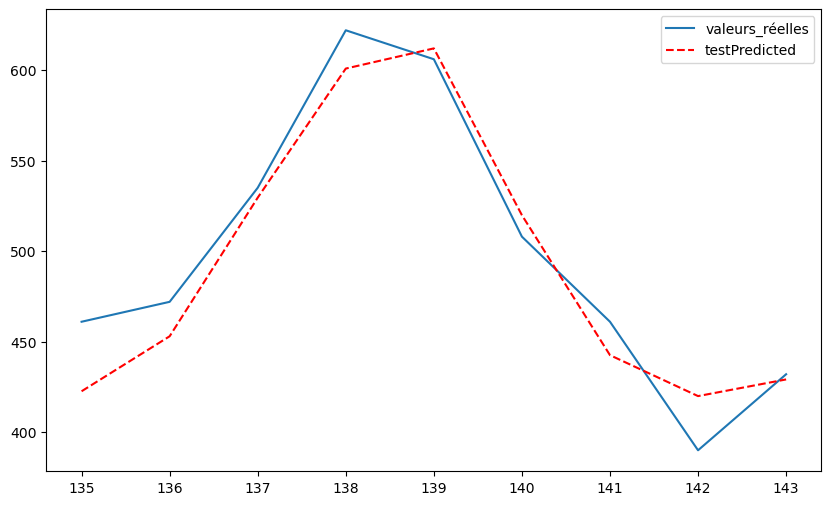

In [205]:
#Zoom sur le plot de test et prédiction
dff=df.reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(dff.index[train_size+window:],dff.values[train_size+window:],label="valeurs_réelles")
plt.plot(testPredictPlot,linestyle='dashed',color="red",label="testPredicted")
#plt.savefig('LSTM_model.png')
plt.legend()
plt.show()

En effet, le modèle démontre une bonne performance, car les prédictions suit fidèlement les tendances des données réelles tout au long de la majorité de la période étudiée, comme en témoignent les lignes qui se superposent largement entre les indices 135 et 140.Malgré un écart entre les deux  cet écart est jugé négligeable et n'entache pas la fiabilité globale du modèle.<b>Cela suggère que le modèle est assez fiable pour capturer les variations dans les données réelles</b>

<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">COMPARAISON DES 3 MODELES(ARIMA/ANN/LSTM)</h4>

<h3>Comparaison des rmses</h3>

In [206]:
rmse=pd.DataFrame({'modèle':['ANN','ARIMA','LSTM'],
                   'rmse_train':[rmse_train_ann,rmse_train_arima,rmse_train_lstm],
                   'rmse_test':[rmse_test_ann,rmse_test_arima,rmse_test_lstm]})

In [207]:
rmse

,modèle,rmse_train,rmse_test
0,ANN,13.337763,21.091619
1,ARIMA,14.858890,17.967146
2,LSTM,12.917312,20.371823


Ce tableau présente les performances de trois modèles différents (ANN, ARIMA et LSTM) en termes de RMSE pour les ensembles d'entraînement et de test, indiquant que<b> l'ARIMA a le RMSE le plus bas pour les données de test, ce qui suggère qu'il a la meilleure précision prédictive parmi les trois modèles</b>.

<h3>Comparaison entre ANN ET LSTM </h3>

In [208]:
pd.DataFrame({'modèle':['ANN','LSTM'],
                   'rmse_train':[rmse_train_ann,rmse_train_lstm],
                   'rmse_test':[rmse_test_ann,rmse_test_lstm]})

,modèle,rmse_train,rmse_test
0,ANN,13.337763,21.091619
1,LSTM,12.917312,20.371823


Le modèle LSTM surpasse l'ANN en précision sur les données de test, avec un RMSE plus faible. En conséquence,<b> le modèle LSTM semble être plus adapté à la prévision de ces données par rapport au modèle ANN.</b>

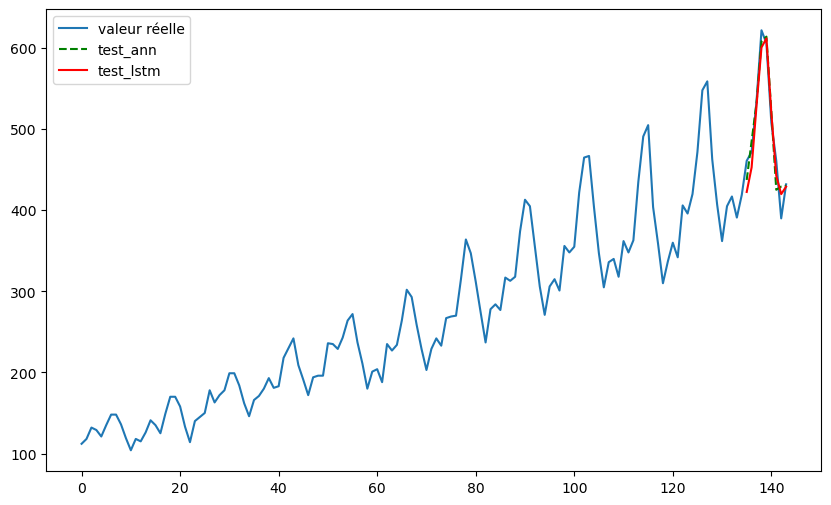

In [209]:
#plot de la serie et les prédiction de test avec ANN et LSTM
plt.figure(figsize=(10, 6))
plt.plot(df.values,label="valeur réelle")
plt.plot(testPredictPlot_ann,linestyle='dashed',color="green",label="test_ann")
plt.plot(testPredictPlot,color="red",label="test_lstm")
#plt.savefig('model.png')
plt.legend()
plt.show()

Ce graphe montre les prévisions sur une série temporelle complète. La ligne bleue représente les valeurs réelles, la ligne pointillée verte représente les prévisions du modèle ANN, et la ligne rouge représente les prévisions du modèle LSTM. On peut voir que les deux modèles suivent de près les valeurs réelles, avec des écarts qui augmentent un peu vers la fin de la série temporelle.<b> Le modèle LSTM semble se rapprocher un peu plus des valeurs réelles que le modèle ANN.</b>

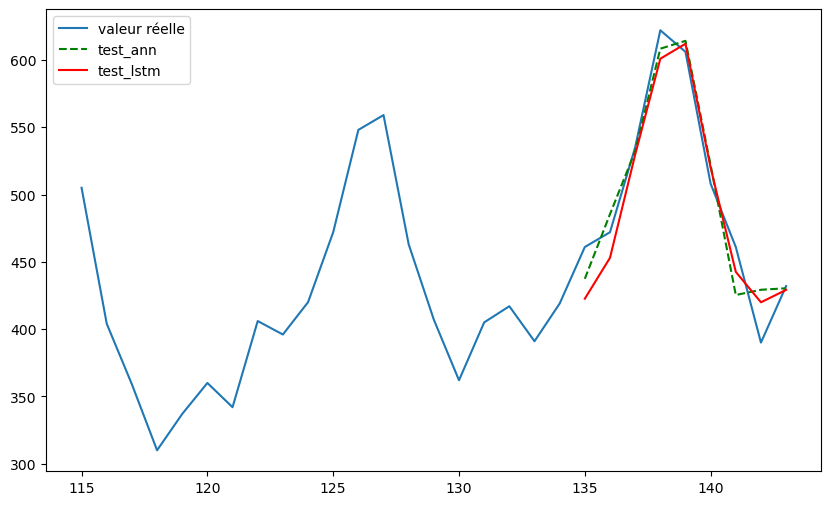

In [210]:
#ZOOOM sur l'ensemble de test uniquement
dff=df.reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(dff.index[train_size:],dff.values[train_size:],label="valeur réelle")
plt.plot(testPredictPlot_ann,linestyle='dashed',color="green",label="test_ann")
plt.plot(testPredictPlot,color="red",label="test_lstm")
#plt.savefig('model.png')
plt.legend()
plt.show()

Ce graphe est un zoom sur la fin de la période, montre que les prévisions du LSTM et de l'ANN suivent de près les valeurs réelles, avec des performances presque identiques.<b> Cependant, le LSTM démontre une précision supérieure, comme l'indiquent les valeurs de RMSE inférieures pour les ensembles d'entraînement et de test.</b>

<h3>Comparaison entre ANN ET ARIMA </h3>

In [636]:
pd.DataFrame({'modèle':['ANN','ARIMA'],
                   'rmse_train':[rmse_train_ann,rmse_train_arima],
                   'rmse_test':[rmse_test_ann,rmse_test_arima]})

,modèle,rmse_train,rmse_test
0,ANN,13.369261,18.652117
1,ARIMA,14.858890,18.000516


L'ARIMA affiche des performances légèrement meilleures sur les données de test en comparaison avec l'ANN.En conséquence,<b> le modèle ARIMA semble être plus adapté à la prévision de ces données par rapport au modèle ANN.</b>

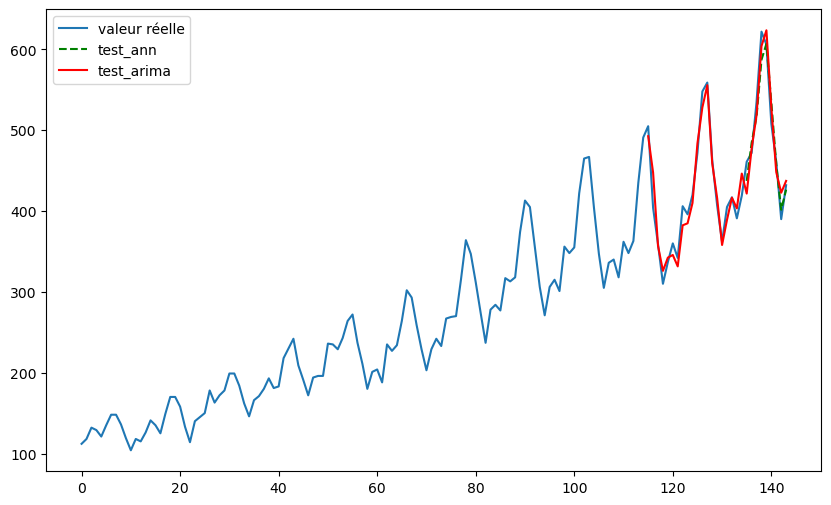

In [637]:
#plot de la serie et les prédiction de test avec ANN et ARIMA
plt.figure(figsize=(10, 6))
plt.plot(df.values,label="valeur réelle")
plt.plot(testPredictPlot_ann,linestyle='dashed',color="green",label="test_ann")
plt.plot(predict_arima,color="red",label="test_arima")
#plt.savefig('model.png')
plt.legend()
plt.show()

Ce graphe montre une comparaison entre les valeurs réelles d'une série temporelle (en bleu) et les prédictions faites par deux modèles différents : un modèle de réseau de neurones artificiels (ANN) en pointillés verts et un modèle ARIMA en rouge. On observe que les prédictions des deux modèles suivent la tendance générale des valeurs réelles.Cependant,<b>l'ARIMA montre un écart moins prononcé par rapport aux valeurs réelles que l'ANN, indiquant une précision supérieure(mais pas grande différence )du modèle ARIMA dans la prédiction de cette série temporelle.</b>

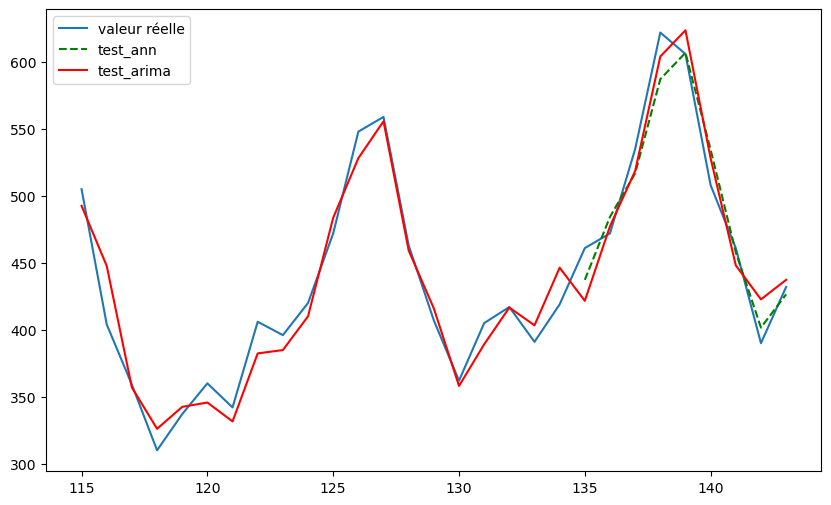

In [638]:
#ZOOOM sur l'ensemble de test uniquement
dff=df.reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(dff.index[train_size:],dff.values[train_size:],label="valeur réelle")
plt.plot(testPredictPlot_ann,linestyle='dashed',color="green",label="test_ann")
plt.plot(predict_arima,color="red",label="test_arima")
#plt.savefig('model.png')
plt.legend()
plt.show()

Ce graphe zoomé sur la fin de la série temporelle permet d'examiner de plus près la performance des modèles prédictifs. On constate que le modèle ARIMA et le modèle ANN épousent de près les valeurs réelles. Néanmoins,<b> le modèle ARIMA se distingue par une correspondance supérieure aux valeurs réelles</b>, démontrée par la ligne rouge qui suit plus fidèlement la ligne bleue des valeurs réelles, surtout aux points de forte variation, tandis que la ligne pointillée verte du modèle ANN montre des écarts plus marqués à ces mêmes points.

<h3>Comparaison entre LSTM ET ARIMA </h3>

In [639]:
pd.DataFrame({'modèle':['ARIMA','LSTM'],
                   'rmse_train':[rmse_train_arima,rmse_train_lstm],
                   'rmse_test':[rmse_test_arima,rmse_test_lstm]})

,modèle,rmse_train,rmse_test
0,ARIMA,14.858890,18.000516
1,LSTM,11.571701,22.755741



L'ARIMA montre une meilleure constance et performance sur les données de test comparé au LSTM.En conséquence,<b> le modèle ARIMA semble être plus adapté à la prévision de ces données par rapport au modèle LSTM.</b>

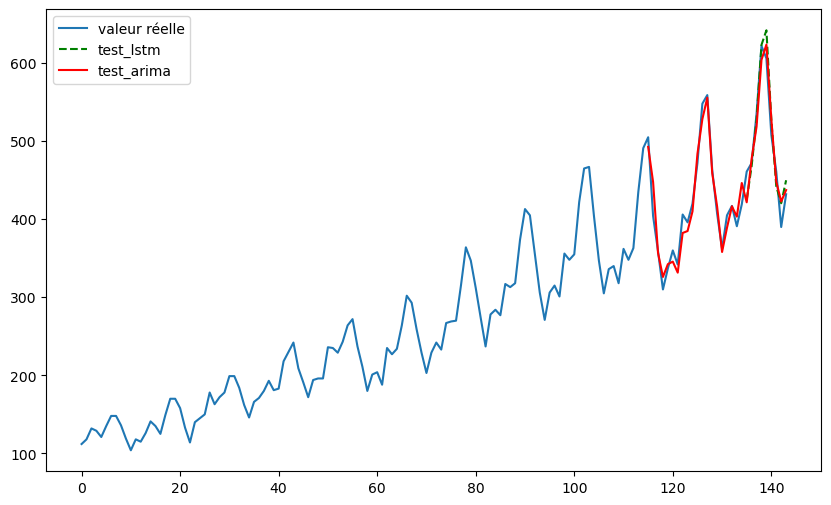

In [640]:
#plot de la serie et les prédiction de test avec ANN et ARIMA
plt.figure(figsize=(10, 6))
plt.plot(df.values,label="valeur réelle")
plt.plot(testPredictPlot,linestyle='dashed',color="green",label="test_lstm")
plt.plot(predict_arima,color="red",label="test_arima")
#plt.savefig('model.png')
plt.legend()
plt.show()

Dans ce graphe, nous voyons la performance de deux modèles de prévision, LSTM (ligne pointillée verte) et ARIMA (ligne rouge), par rapport aux valeurs réelles d'une série temporelle (ligne bleue). Le modèle ARIMA suit de près les valeurs réelles tout au long de la série, tandis que le modèle <b>LSTM présente des écarts significatifs par moments, ce qui pourrait indiquer une moindre précision par rapport au modèle ARIMA.</b>

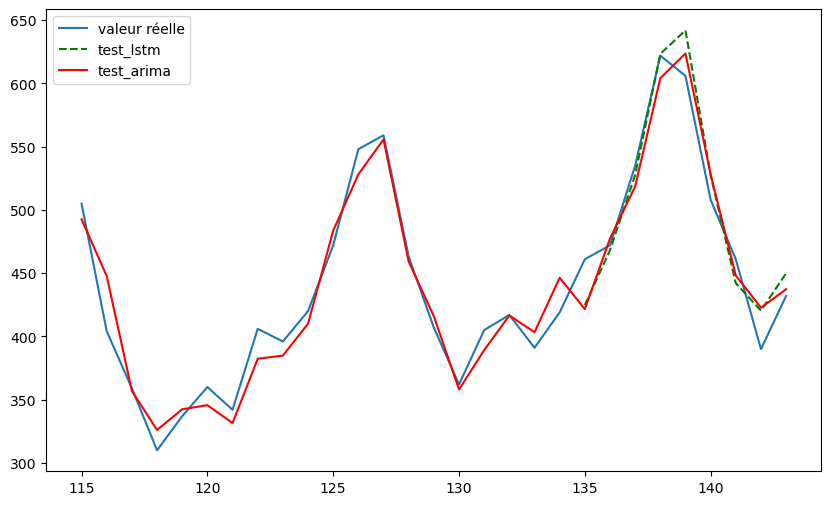

In [641]:
#ZOOOM sur l'ensemble de test uniquement
dff=df.reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(dff.index[train_size:],dff.values[train_size:],label="valeur réelle")
plt.plot(testPredictPlot,linestyle='dashed',color="green",label="test_lstm")
plt.plot(predict_arima,color="red",label="test_arima")
#plt.savefig('model.png')
plt.legend()
plt.show()

Le graphique zoomé de la fin de la série temporelle détaille la comparaison entre les prévisions des modèles LSTM et ARIMA avec les valeurs réelles.<b> Les prévisions du modèle ARIMA sont plus similaires à celles   des valeurs réelles que du modèle LSTM, ce qui implique que l'ARIMA pourrait être plus adapté à la prévision de ces données que le LSTM.</b>_

<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">THE END</h4>